# Generation of the plots and figures showing the test metrics of the evaluated methods

In [1]:
import numpy as np

import pandas as pd
import geopandas as gpd
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_path = os.path.join('/','home','fterroso','data','Spain-INE-mobility-study-2020')

/home/fterroso/python/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/home/fterroso/python/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def add_total_values_fn(trips_df_):
    trips_df_['total'] = trips_df_.sum(axis=1) # column with total number of trips per area
    trips_df_.loc['total'] = trips_df_.sum(axis=0) # row with total number of trips per day
    return trips_df_

## Read zones geography

In [3]:
zones_gdf = gpd.read_file(os.path.join(data_path,'zonificacion','distritos_mitma.shp'))
zones_gdf = zones_gdf.set_index('ID')

In [4]:
zones_gdf.head()

geometry
ID                                                         
2408910   POLYGON ((290940.137 4719080.203, 290956.704 4...
22117_AM  POLYGON ((774184.362 4662152.523, 774452.348 4...
2305009   POLYGON ((429744.982 4179976.538, 429716.997 4...
07058_AM  POLYGON ((1000859.396 4415059.160, 1000625.088...
2305006   POLYGON ((429795.125 4180956.539, 429860.816 4...

## Read Madrid zones

In [5]:
mad_neigh = gpd.read_file(os.path.join('/','home','fterroso','data','MAD-neighborhoods'))

In [6]:
mad_neigh.head()

CODBDT GEOCODIGO           DESBDT  \
0  907409    079011      011 Palacio   
1  907410    079012  012 Embajadores   
2  907411    079013       013 Cortes   
3  907412    079014     014 Justicia   
4  907413    079015  015 Universidad   

                                            geometry  
0  POLYGON ((439821.423 4474889.157, 439833.708 4...  
1  POLYGON ((440369.412 4473937.262, 440380.549 4...  
2  POLYGON ((440872.264 4474491.446, 440909.644 4...  
3  POLYGON ((440920.102 4475481.029, 440924.669 4...  
4  POLYGON ((439586.516 4475753.323, 439594.830 4...

In [7]:
mad_zones = gpd.sjoin(zones_gdf, mad_neigh, how='inner')

/home/fterroso/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3042
Right CRS: None

  """Entry point for launching an IPython kernel.


In [8]:
mad_zones.shape

(361, 5)

In [9]:
mad_zones.head()

geometry  index_right  \
ID                                                                        
2807405  POLYGON ((436303.017 4463555.132, 436195.808 4...          106   
2806503  POLYGON ((436510.630 4459283.550, 436200.341 4...          106   
2806504  POLYGON ((440242.028 4457704.454, 440215.125 4...          106   
2807912  POLYGON ((441984.015 4468463.462, 442098.076 4...          106   
2807917  POLYGON ((443148.458 4466349.436, 443143.395 4...          106   

         CODBDT GEOCODIGO          DESBDT  
ID                                         
2807405  907515    079171  171 San Andrés  
2806503  907515    079171  171 San Andrés  
2806504  907515    079171  171 San Andrés  
2807912  907515    079171  171 San Andrés  
2807917  907515    079171  171 San Andrés

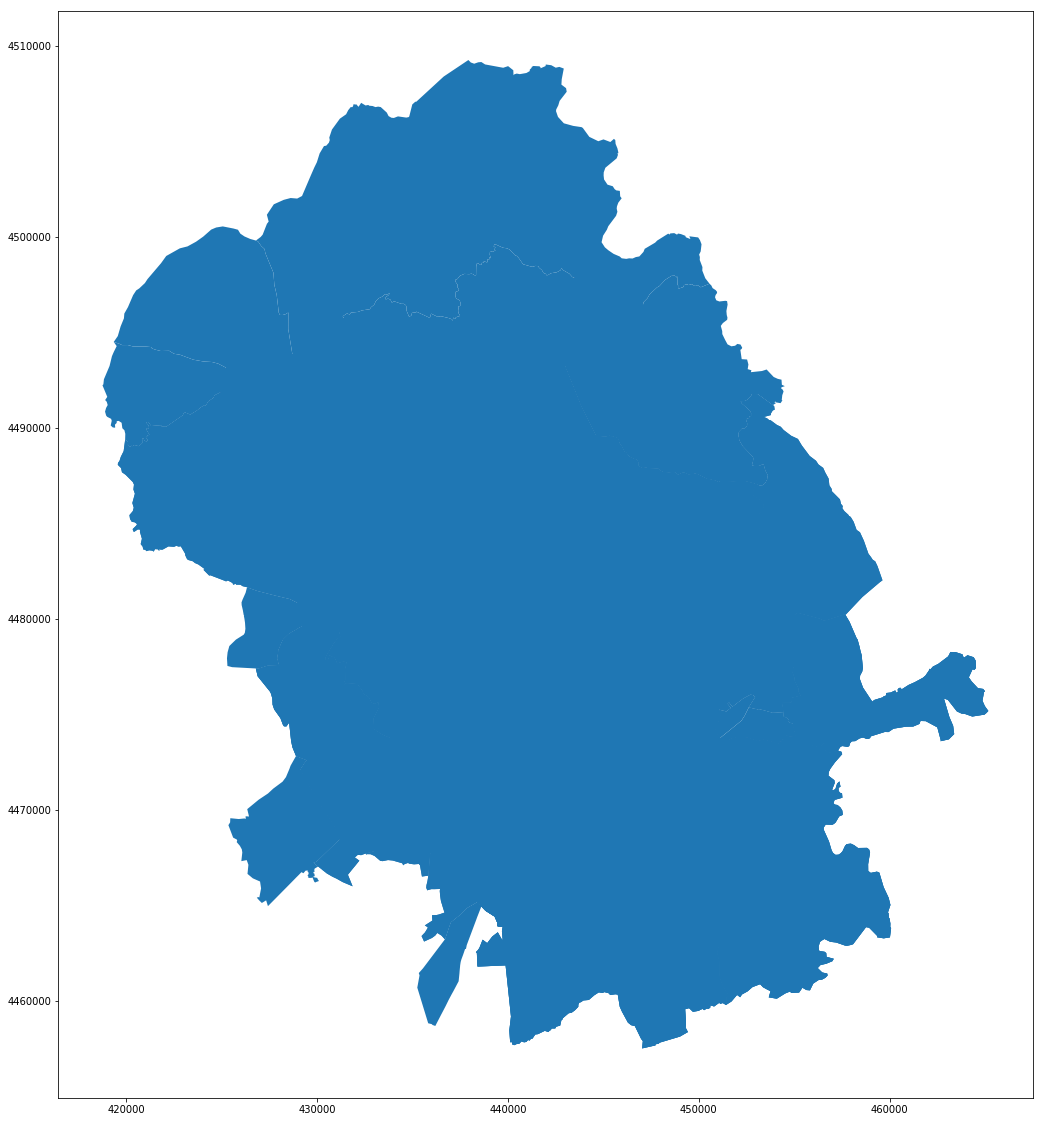

In [10]:
mad_zones.plot(figsize=(20,20));

## Read raw time series

In [11]:
inter_trips = pd.read_csv(os.path.join('data','trips_time_series_all_inter.csv'),index_col=0)
inter_trips= inter_trips.fillna(0)
inter_trips = add_total_values_fn(inter_trips)

In [12]:
inter_trips.tail()

20200221_00  20200221_01  20200221_02  20200221_03  20200221_04  \
05220_AM        0.000        0.000        0.000         0.00        0.000   
40149_AM        0.000        0.000        0.000         0.00        0.000   
31092_AM        0.000        0.000        0.000         0.00        0.000   
20903           0.000        0.000        0.000         0.00        0.000   
total     1684916.941  1226649.105  1042022.789   1060856.35  1416676.085   

          20200221_05  20200221_06  20200221_07  20200221_08  20200221_09  \
05220_AM        0.000        0.000        0.000        0.000        0.000   
40149_AM        0.000        0.000        0.000        0.000        0.000   
31092_AM        0.000        0.000        0.000        0.000        0.000   
20903           0.000        0.000        0.000        0.000        0.000   
total     2260724.424  3464423.098  5400817.701  5740627.237  5047932.524   

          ...  20201130_15  20201130_16  20201130_17  20201130_18  \
05220_AM  ...        0.000        0.000        0.000        0.000   
40149_AM  ...        0.000        0.000        0.000        0.000   
31092_AM  ...      263.079      312.210      233.029       58.550   
20903     ...        0.000        0.000        0.000        0.000   
total     ...  5060517.688  4719101.508  4925188.213  4992998.135   

          20201130_19  20201130_20  20201130_21  20201130_22  20201130_23  \
05220_AM        0.000        0.000        0.000        0.000        0.000   
40149_AM        0.000        0.000        0.000        0.000        0.000   
31092_AM      178.702       64.342        9.760       11.840        0.000   
20903           0.000        0.000        0.000        0.000        0.000   
total     4451594.013  3834109.629  3071823.504  2149818.919  1210790.486   

                 total  
05220_AM  3.975651e+05  
40149_AM  1.470990e+04  
31092_AM  8.443220e+05  
20903     2.786355e+05  
total     2.021387e+10  

[5 rows x 6816 columns]

## Model results

In [13]:
def convert_to_stacked_format_fn(df, method_, method_details= None):
    df = df.rename(columns={'{}-MAE'.format(method_): 'MAE', '{}-MSE'.format(method_): 'MSE', '{}-RMSE'.format(method_):'RMSE'})
    df= df.stack().to_frame().reset_index().rename(columns={'level_1':'metric', 0:'value'})
    if method_details != None:
        df['method']= '{}-{}'.format(method_,method_details)
    else:
        df['method']= method_
    return df

### GNN (with distance matrix) and naive results

In [14]:
test_metrics_df = pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_2000_2842.csv'), index_col='area_id')
gnn_test_metrics_df= test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_dist_metrics_stack_df = convert_to_stacked_format_fn(gnn_test_metrics_df, 'gnn', method_details='dist')

In [15]:
test_metrics_df.head()

Unnamed: 0     gnn-MAE       gnn-MSE    gnn-RMSE   naive-MAE  \
area_id                                                                  
01001_AM           0  132.423462  36249.503814  190.393025  276.984112   
01002              1   92.057607  15412.736851  124.148044  180.952380   
01010_AM           2   83.663037  13915.341843  117.963307  153.383343   
01031_AM           3  110.986152  21127.659829  145.353568  192.155612   
01036              4  132.878835  31380.559909  177.145590  249.409751   

              naive-MSE  naive-RMSE  
area_id                              
01001_AM  131909.775331  363.193854  
01002      52010.732352  228.058616  
01010_AM   40259.087430  200.646673  
01031_AM   58835.186395  242.559655  
01036     104119.062604  322.674856

In [16]:
naive_test_metrics_df= test_metrics_df['naive-MAE naive-MSE naive-RMSE'.split()]
naive_test_metrics_stack_df = convert_to_stacked_format_fn(naive_test_metrics_df, 'naive')

In [17]:
gnn_dist_metrics_stack_df.head()

area_id metric         value    method
0  01001_AM    MAE    132.423462  gnn-dist
1  01001_AM    MSE  36249.503814  gnn-dist
2  01001_AM   RMSE    190.393025  gnn-dist
3     01002    MAE     92.057607  gnn-dist
4     01002    MSE  15412.736851  gnn-dist

In [18]:
naive_test_metrics_df.head()

naive-MAE      naive-MSE  naive-RMSE
area_id                                        
01001_AM  276.984112  131909.775331  363.193854
01002     180.952380   52010.732352  228.058616
01010_AM  153.383343   40259.087430  200.646673
01031_AM  192.155612   58835.186395  242.559655
01036     249.409751  104119.062604  322.674856

### GNN with adjacency matrix

In [19]:
gnn_cont_test_metrics_df = pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_contiguity.csv'), index_col='area_id')
gnn_cont_test_metrics_df= gnn_cont_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_cont_metrics_stack_df = convert_to_stacked_format_fn(gnn_cont_test_metrics_df, 'gnn', method_details='cont')

In [20]:
gnn_cont_test_metrics_df.head()

gnn-MAE       gnn-MSE    gnn-RMSE
area_id                                       
01001_AM  110.459684  23219.103375  152.378159
01002      79.729015  11195.554209  105.809046
01010_AM   67.515261   8590.495877   92.684928
01031_AM  136.050548  30120.989992  173.553997
01036     121.956103  24580.342910  156.781194

In [21]:
gnn_cont_metrics_stack_df.head()

area_id metric         value    method
0  01001_AM    MAE    110.459684  gnn-cont
1  01001_AM    MSE  23219.103375  gnn-cont
2  01001_AM   RMSE    152.378159  gnn-cont
3     01002    MAE     79.729015  gnn-cont
4     01002    MSE  11195.554209  gnn-cont

In [22]:
test_metrics_df[['gnn-cont-MAE', 'gnn-cont-MSE', 'gnn-cont-RMSE']]= gnn_cont_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### GNN with gravity-model

In [23]:
gnn_gm_test_metrics_df = pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_gravity_model.csv'), index_col='area_id')
gnn_gm_test_metrics_df= gnn_gm_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_gm_metrics_stack_df = convert_to_stacked_format_fn(gnn_gm_test_metrics_df, 'gnn', method_details='gm')

In [24]:
gnn_gm_test_metrics_df.head()

gnn-MAE        gnn-MSE    gnn-RMSE
area_id                                        
01001_AM  378.511861  213178.633786  461.712718
01002     217.769279   76137.685724  275.930581
01010_AM  193.148522   57926.587577  240.679429
01031_AM  233.391340   88798.277438  297.990398
01036     317.331028  175263.271100  418.644564

In [25]:
gnn_gm_metrics_stack_df.head()

area_id metric          value  method
0  01001_AM    MAE     378.511861  gnn-gm
1  01001_AM    MSE  213178.633786  gnn-gm
2  01001_AM   RMSE     461.712718  gnn-gm
3     01002    MAE     217.769279  gnn-gm
4     01002    MSE   76137.685724  gnn-gm

In [26]:
test_metrics_df[['gnn-gm-MAE', 'gnn-gm-MSE', 'gnn-gm-RMSE']]= gnn_gm_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### GNN with queen + GM

In [27]:
gnn_qgm_test_metrics_df = pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_queen_gravity_model.csv'), index_col='area_id')
gnn_qgm_test_metrics_df= gnn_qgm_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_qgm_metrics_stack_df = convert_to_stacked_format_fn(gnn_qgm_test_metrics_df, 'gnn', method_details='q-gm')

In [28]:
gnn_qgm_test_metrics_df.head()

gnn-MAE       gnn-MSE    gnn-RMSE
area_id                                       
01001_AM  107.504493  22977.648747  151.583801
01002      87.938475  14659.571751  121.076718
01010_AM   69.832367   9169.008291   95.754939
01031_AM  136.304999  32035.901743  178.985758
01036     142.032455  36609.072073  191.334973

In [29]:
gnn_qgm_metrics_stack_df.head()

area_id metric         value    method
0  01001_AM    MAE    107.504493  gnn-q-gm
1  01001_AM    MSE  22977.648747  gnn-q-gm
2  01001_AM   RMSE    151.583801  gnn-q-gm
3     01002    MAE     87.938475  gnn-q-gm
4     01002    MSE  14659.571751  gnn-q-gm

In [30]:
test_metrics_df[['gnn-q-gm-MAE', 'gnn-q-gm-MSE', 'gnn-q-gm-RMSE']]= gnn_qgm_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### GNN with ylag

In [31]:
gnn_ylag_test_metrics_df = pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_ylag.csv'), index_col='area_id')
gnn_ylag_test_metrics_df= gnn_ylag_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_ylag_metrics_stack_df = convert_to_stacked_format_fn(gnn_ylag_test_metrics_df, 'gnn', method_details='ylag')

In [32]:
gnn_ylag_test_metrics_df.head()

gnn-MAE       gnn-MSE    gnn-RMSE
area_id                                       
01001_AM  121.537843  27770.667727  166.645335
01002      82.744959  12273.663696  110.786568
01010_AM   68.721962   8765.633325   93.624961
01031_AM  145.159494  36147.891765  190.125989
01036     133.828197  29584.857420  172.002492

In [33]:
gnn_ylag_metrics_stack_df.head()

area_id metric         value    method
0  01001_AM    MAE    121.537843  gnn-ylag
1  01001_AM    MSE  27770.667727  gnn-ylag
2  01001_AM   RMSE    166.645335  gnn-ylag
3     01002    MAE     82.744959  gnn-ylag
4     01002    MSE  12273.663696  gnn-ylag

In [34]:
test_metrics_df[['gnn-ylag-MAE', 'gnn-ylag-MSE', 'gnn-ylag-RMSE']]= gnn_ylag_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### LSTM results

In [35]:
lstm_test_metrics_0_500_df = pd.read_csv(os.path.join('data', 'lstm_test_metrics_0_500.csv'), index_col='area_id')
lstm_test_metrics_500_1000_df = pd.read_csv(os.path.join('/','data', 'lstm_test_metrics_500_1000.csv'), index_col='area_id')
lstm_test_metrics_1000_1500_df = pd.read_csv(os.path.join('/','data', 'lstm_test_metrics_1000_1500.csv'), index_col='area_id')
lstm_test_metrics_1500_2000_df = pd.read_csv(os.path.join('/','data', 'lstm_test_metrics_1500_2000.csv'), index_col='area_id')
lstm_test_metrics_2000_2842_df = pd.read_csv(os.path.join('/','data', 'lstm_test_metrics_2000_2842.csv'), index_col='area_id')

In [36]:
lstm_test_metrics_df = pd.concat([lstm_test_metrics_0_500_df, 
                                  lstm_test_metrics_500_1000_df,
                                 lstm_test_metrics_1000_1500_df,
                                 lstm_test_metrics_1500_2000_df,
                                 lstm_test_metrics_2000_2842_df])

In [37]:
lstm_test_metrics_df

Unnamed: 0    lstm-MAE      lstm-MSE   lstm-RMSE
area_id                                                   
01001_AM           0  239.250634  88946.511323  298.239017
01002              1  147.479784  39803.592978  199.508378
01010_AM           2  127.839511  24787.531891  157.440566
01031_AM           3  149.800650  33978.659705  184.333013
01036              4  203.731674  72795.301544  269.806044
...              ...         ...           ...         ...
20052_AM         837  176.776327  49028.714321  221.424286
33072_AM         838   11.882857   1801.414729   42.443076
38013_AM         839    4.384063     19.220011    4.384063
05220_AM         840   72.023092   9029.542623   95.023906
40149_AM         841   10.516292    110.592395   10.516292

[2842 rows x 4 columns]

In [38]:
test_metrics_df[['lstm-MAE', 'lstm-MSE', 'lstm-RMSE']]= lstm_test_metrics_df[['lstm-MAE', 'lstm-MSE', 'lstm-RMSE']]

In [39]:
lstm_test_metrics_stack_df = convert_to_stacked_format_fn(lstm_test_metrics_df, 'lstm')

In [40]:
lstm_test_metrics_stack_df.head()

area_id      metric         value method
0  01001_AM  Unnamed: 0      0.000000   lstm
1  01001_AM         MAE    239.250634   lstm
2  01001_AM         MSE  88946.511323   lstm
3  01001_AM        RMSE    298.239017   lstm
4     01002  Unnamed: 0      1.000000   lstm

### ARIMA results

In [41]:
arima_test_metrics_0_500_df = pd.read_csv(os.path.join('/','data', 'arima_test_metrics_0_500_2.csv'), index_col='area_id')
arima_test_metrics_500_1000_df = pd.read_csv(os.path.join('/','data', 'arima_test_metrics_500_1000_2.csv'), index_col='area_id')
arima_test_metrics_1000_1500_df = pd.read_csv(os.path.join('/','data', 'arima_test_metrics_1000_1500_2.csv'), index_col='area_id')
arima_test_metrics_1500_2000_df = pd.read_csv(os.path.join('/','data', 'arima_test_metrics_1500_2000_2.csv'), index_col='area_id')
arima_test_metrics_2000_2842_df = pd.read_csv(os.path.join('/','data', 'arima_test_metrics_2000_2842_2.csv'), index_col='area_id')

In [42]:
arima_test_metrics_df = pd.concat([arima_test_metrics_0_500_df, 
                                  arima_test_metrics_500_1000_df,
                                 arima_test_metrics_1000_1500_df,
                                 arima_test_metrics_1500_2000_df,
                                 arima_test_metrics_2000_2842_df])

In [43]:
arima_test_metrics_stack_df = convert_to_stacked_format_fn(arima_test_metrics_df, 'arima')

In [44]:
arima_test_metrics_df.head()

Unnamed: 0   arima-MAE      arima-MSE  arima-RMSE
area_id                                                    
01001_AM           0   81.324498    6613.673944   81.324498
01002              1  130.484099   17026.100077  130.484099
01010_AM           2   43.395710    1883.187646   43.395710
01031_AM           3   21.747880     472.970297   21.747880
01036              4  321.574864  103410.393304  321.574864

In [45]:
test_metrics_df[['arima-MAE', 'arima-MSE', 'arima-RMSE']]= arima_test_metrics_df[['arima-MAE', 'arima-MSE', 'arima-RMSE']]

In [46]:
pd.options.display.float_format = '{:.3f}'.format

In [47]:
test_metrics_df.mean()

Unnamed: 0         1421.500
gnn-MAE             215.477
gnn-MSE          206847.458
gnn-RMSE            287.782
naive-MAE           445.657
naive-MSE        844369.636
naive-RMSE          564.808
gnn-cont-MAE        171.926
gnn-cont-MSE     120676.856
gnn-cont-RMSE       223.957
gnn-gm-MAE          600.806
gnn-gm-MSE      1379650.853
gnn-gm-RMSE         710.023
gnn-q-gm-MAE        160.940
gnn-q-gm-MSE     102270.633
gnn-q-gm-RMSE       215.096
gnn-ylag-MAE        164.947
gnn-ylag-MSE      99771.510
gnn-ylag-RMSE       215.585
lstm-MAE            287.785
lstm-MSE         240561.220
lstm-RMSE           365.183
arima-MAE           131.613
arima-MSE         53295.374
arima-RMSE          131.613
dtype: float64

In [48]:
test_metrics_df.std()

Unnamed: 0          821.136
gnn-MAE             266.398
gnn-MSE          912681.937
gnn-RMSE            352.239
naive-MAE           573.288
naive-MSE       3552303.321
naive-RMSE          724.946
gnn-cont-MAE        202.484
gnn-cont-MSE     629199.550
gnn-cont-RMSE       265.603
gnn-gm-MAE          799.104
gnn-gm-MSE      6123723.782
gnn-gm-RMSE         935.856
gnn-q-gm-MAE        171.504
gnn-q-gm-MSE     479770.322
gnn-q-gm-RMSE       236.694
gnn-ylag-MAE        173.624
gnn-ylag-MSE     481495.175
gnn-ylag-RMSE       230.896
lstm-MAE            249.074
lstm-MSE         674004.559
lstm-RMSE           327.476
arima-MAE           189.702
arima-MSE        249934.954
arima-RMSE          189.702
dtype: float64

## Concat all results

In [49]:
all_results= pd.concat([gnn_dist_metrics_stack_df,
                        gnn_cont_metrics_stack_df,
                        gnn_gm_metrics_stack_df,
                        gnn_qgm_metrics_stack_df,
                        gnn_ylag_metrics_stack_df,
                        naive_test_metrics_stack_df,
                        lstm_test_metrics_stack_df,
                        arima_test_metrics_stack_df], axis=0)

In [50]:
all_results.head()

area_id metric     value    method
0  01001_AM    MAE   132.423  gnn-dist
1  01001_AM    MSE 36249.504  gnn-dist
2  01001_AM   RMSE   190.393  gnn-dist
3     01002    MAE    92.058  gnn-dist
4     01002    MSE 15412.737  gnn-dist

## Box plot with all metrics

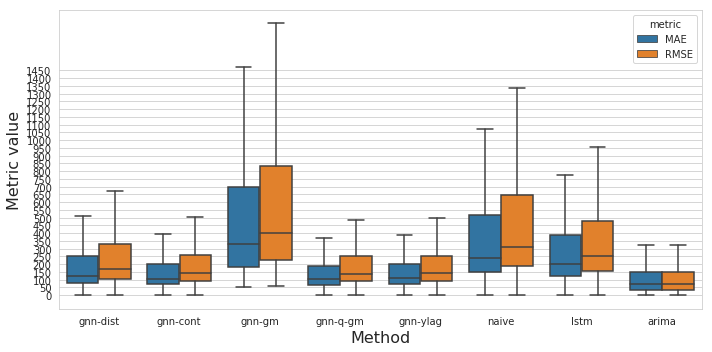

In [51]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax= sns.boxplot(data=all_results[all_results['metric'].isin(['MAE', 'RMSE'])], x='method', y='value', hue='metric', showfliers = False);
ax.set_yticks(np.arange(0,1500,50))
ax.set_ylabel('Metric value')
ax.set_xlabel('Method')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.tight_layout()
plt.savefig(os.path.join('figs', 'test_values_MAE_RMSE.png'))

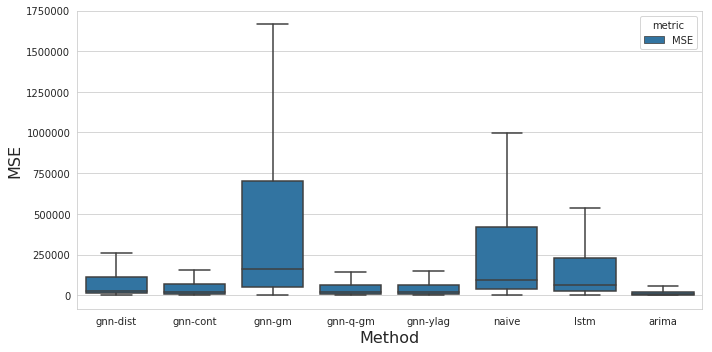

In [52]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax= sns.boxplot(data=all_results[all_results['metric'].isin(['MSE'])], x='method', y='value', hue='metric', showfliers = False);
ax.set_ylabel('MSE')
ax.set_xlabel('Method')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.tight_layout()
plt.savefig(os.path.join('figs', 'test_values_MSE.png'))

## Maps with metrics

In [53]:
test_metrics_df['total_trips'] = inter_trips['total']
test_metrics_df['geometry'] = zones_gdf['geometry']
test_metrics_df = test_metrics_df.fillna(0)

In [54]:
test_metrics_df.head()

Unnamed: 0  gnn-MAE   gnn-MSE  gnn-RMSE  naive-MAE  naive-MSE  \
area_id                                                                   
01001_AM           0  132.423 36249.504   190.393    276.984 131909.775   
01002              1   92.058 15412.737   124.148    180.952  52010.732   
01010_AM           2   83.663 13915.342   117.963    153.383  40259.087   
01031_AM           3  110.986 21127.660   145.354    192.156  58835.186   
01036              4  132.879 31380.560   177.146    249.410 104119.063   

          naive-RMSE  gnn-cont-MAE  gnn-cont-MSE  gnn-cont-RMSE  ...  \
area_id                                                          ...   
01001_AM     363.194       110.460     23219.103        152.378  ...   
01002        228.059        79.729     11195.554        105.809  ...   
01010_AM     200.647        67.515      8590.496         92.685  ...   
01031_AM     242.560       136.051     30120.990        173.554  ...   
01036        322.675       121.956     24580.343        156.781  ...   

          gnn-ylag-MSE  gnn-ylag-RMSE  lstm-MAE  lstm-MSE  lstm-RMSE  \
area_id                                                                
01001_AM     27770.668        166.645   239.251 88946.511    298.239   
01002        12273.664        110.787   147.480 39803.593    199.508   
01010_AM      8765.633         93.625   127.840 24787.532    157.441   
01031_AM     36147.892        190.126   149.801 33978.660    184.333   
01036        29584.857        172.002   203.732 72795.302    269.806   

          arima-MAE  arima-MSE  arima-RMSE  total_trips  \
area_id                                                   
01001_AM     81.324   6613.674      81.324  4189691.344   
01002       130.484  17026.100     130.484  2441188.659   
01010_AM     43.396   1883.188      43.396  1988351.484   
01031_AM     21.748    472.970      21.748  3330112.565   
01036       321.575 103410.393     321.575  3408282.950   

                                                   geometry  
area_id                                                      
01001_AM  POLYGON ((543638.233 4737457.613, 543361.544 4...  
01002     MULTIPOLYGON (((502019.579 4753948.366, 501874...  
01010_AM  POLYGON ((499938.436 4768365.760, 499305.175 4...  
01031_AM  MULTIPOLYGON (((542515.689 4705413.036, 542580...  
01036     POLYGON ((505001.864 4776212.132, 505252.582 4...  

[5 rows x 27 columns]

In [55]:
results_gdf = gpd.GeoDataFrame(test_metrics_df, geometry=test_metrics_df['geometry'])

In [56]:
results_gdf.shape

(2844, 27)

In [57]:
def generate_map_plot_fn(gdf, column_name, scheme='quantiles'):
    f, ax = plt.subplots(1, figsize=(20, 20))
    
    if scheme =='quantiles':
        gdf.plot(column=column_name, scheme='quantiles', \
            k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
            edgecolor='black', legend=True)
    else:
        gdf.plot(column=column_name,
                 scheme='user_defined', 
                 classification_kwds={'bins':[100, 500, 1000, 2000, 3000]}, 
                 cmap='GnBu', linewidth=0.1, ax=ax, 
                 edgecolor='black', legend=True)
        #
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join('figs', 'map_{}_{}.png'.format(column_name, scheme)))
    plt.show()  

### Spain results

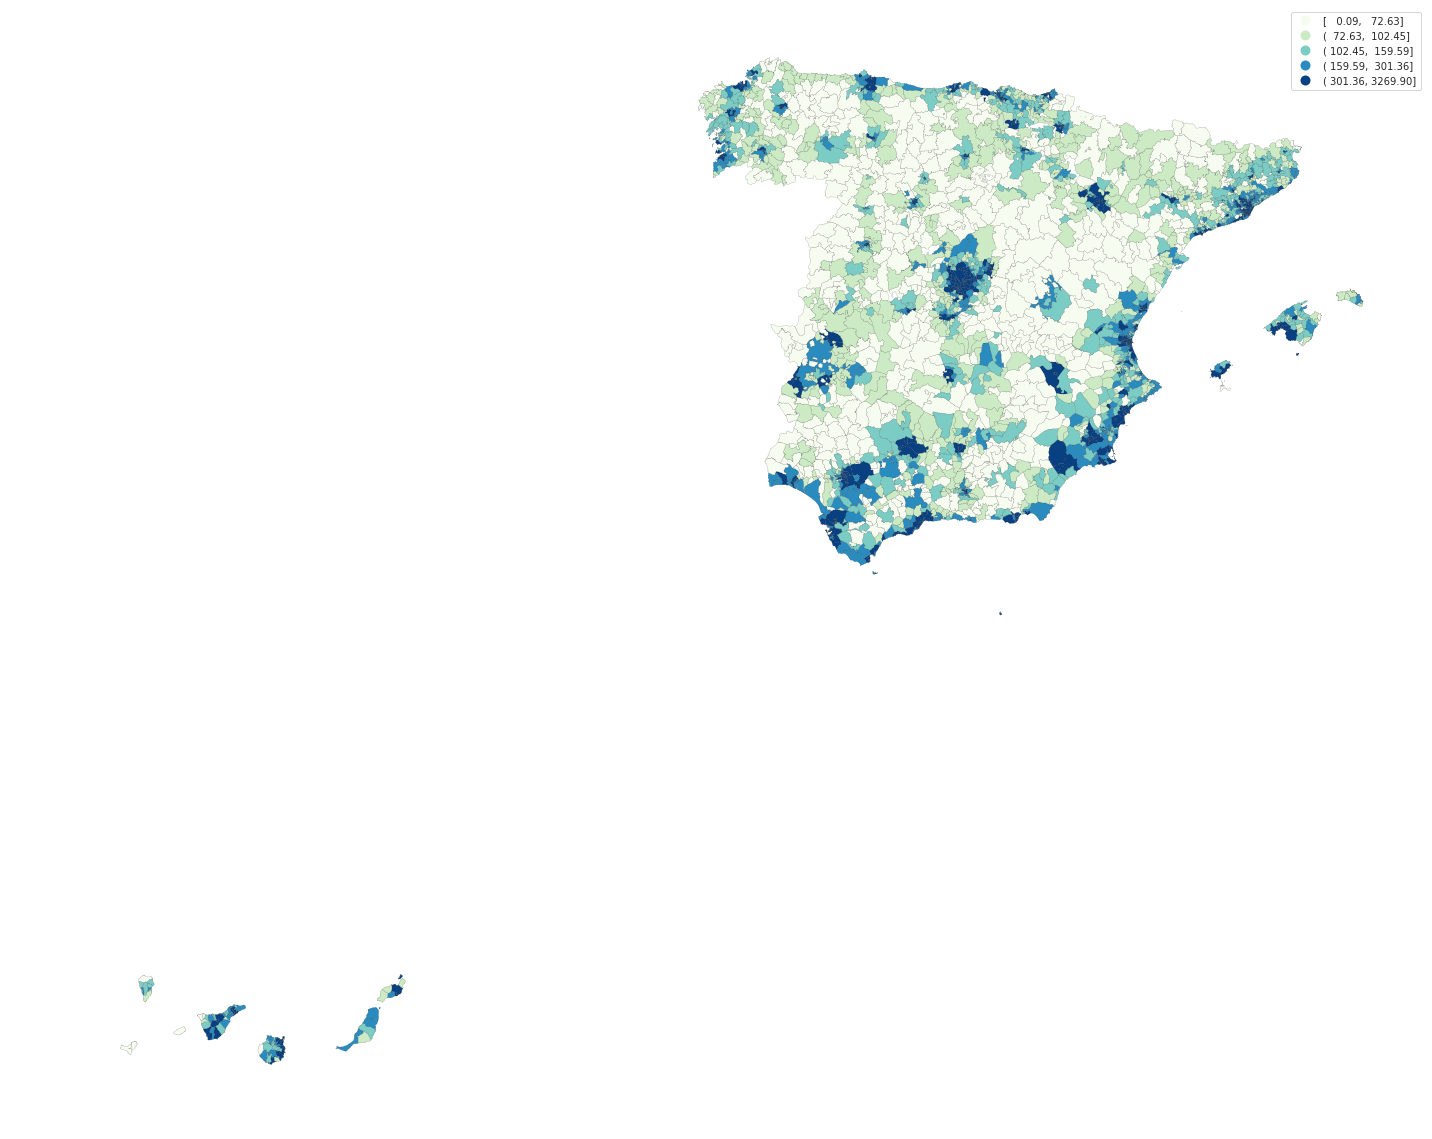

In [58]:
generate_map_plot_fn(results_gdf, 'gnn-MAE')


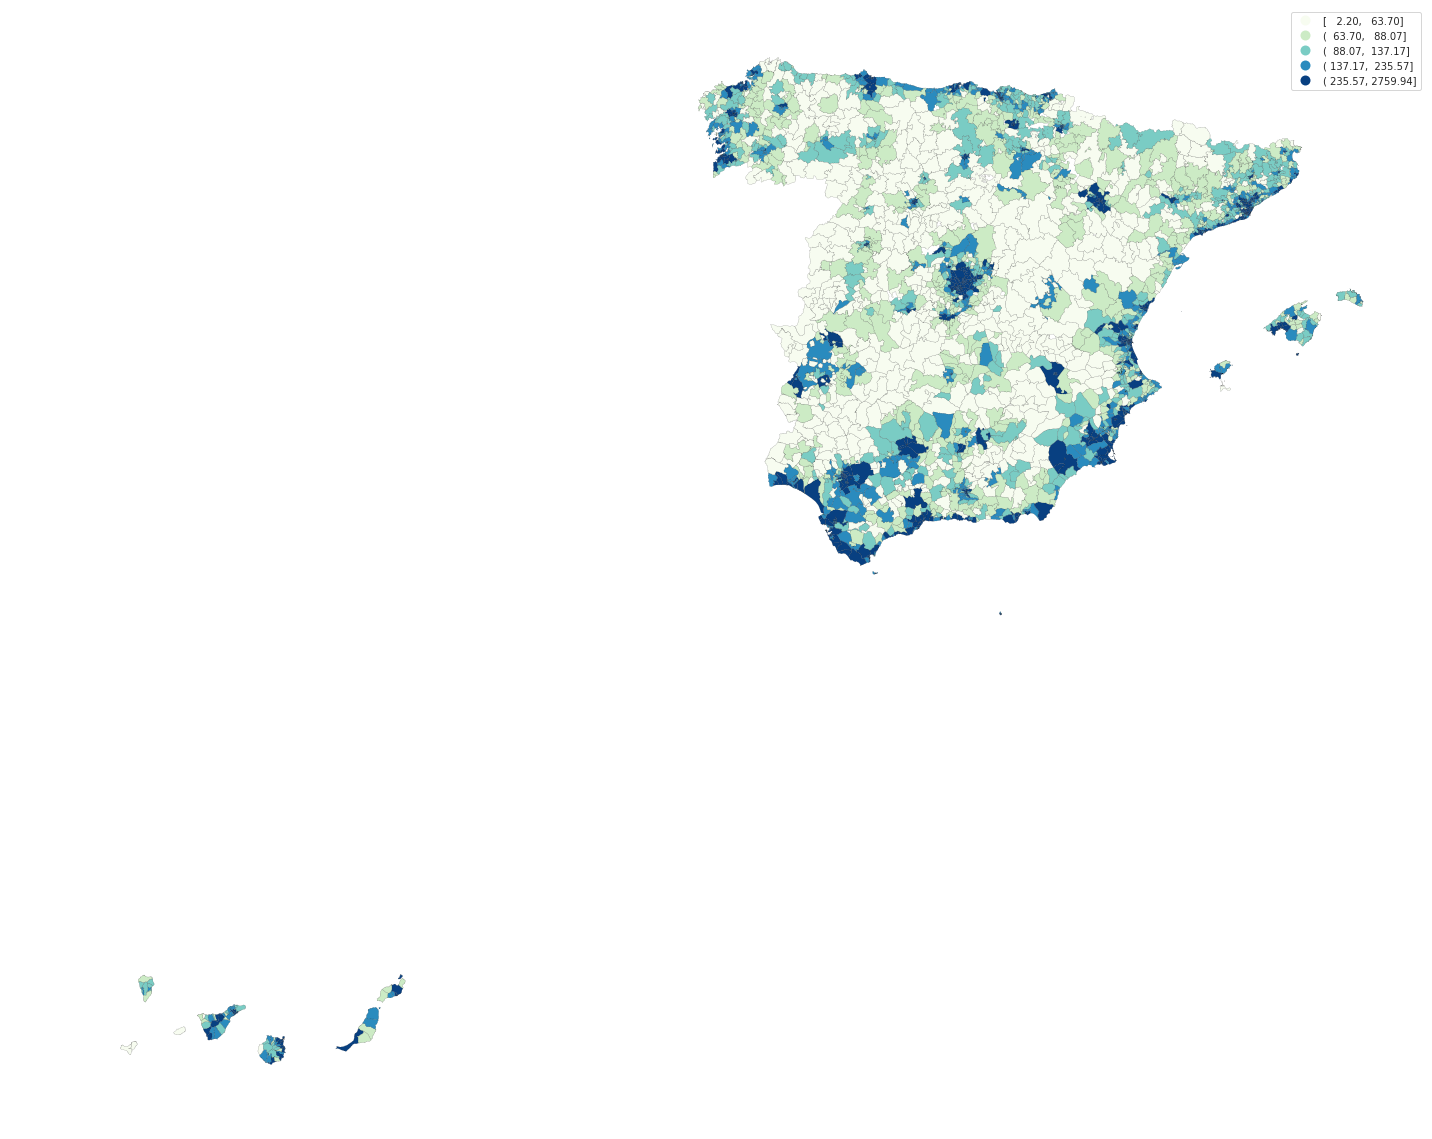

In [59]:
generate_map_plot_fn(results_gdf, 'gnn-cont-MAE')

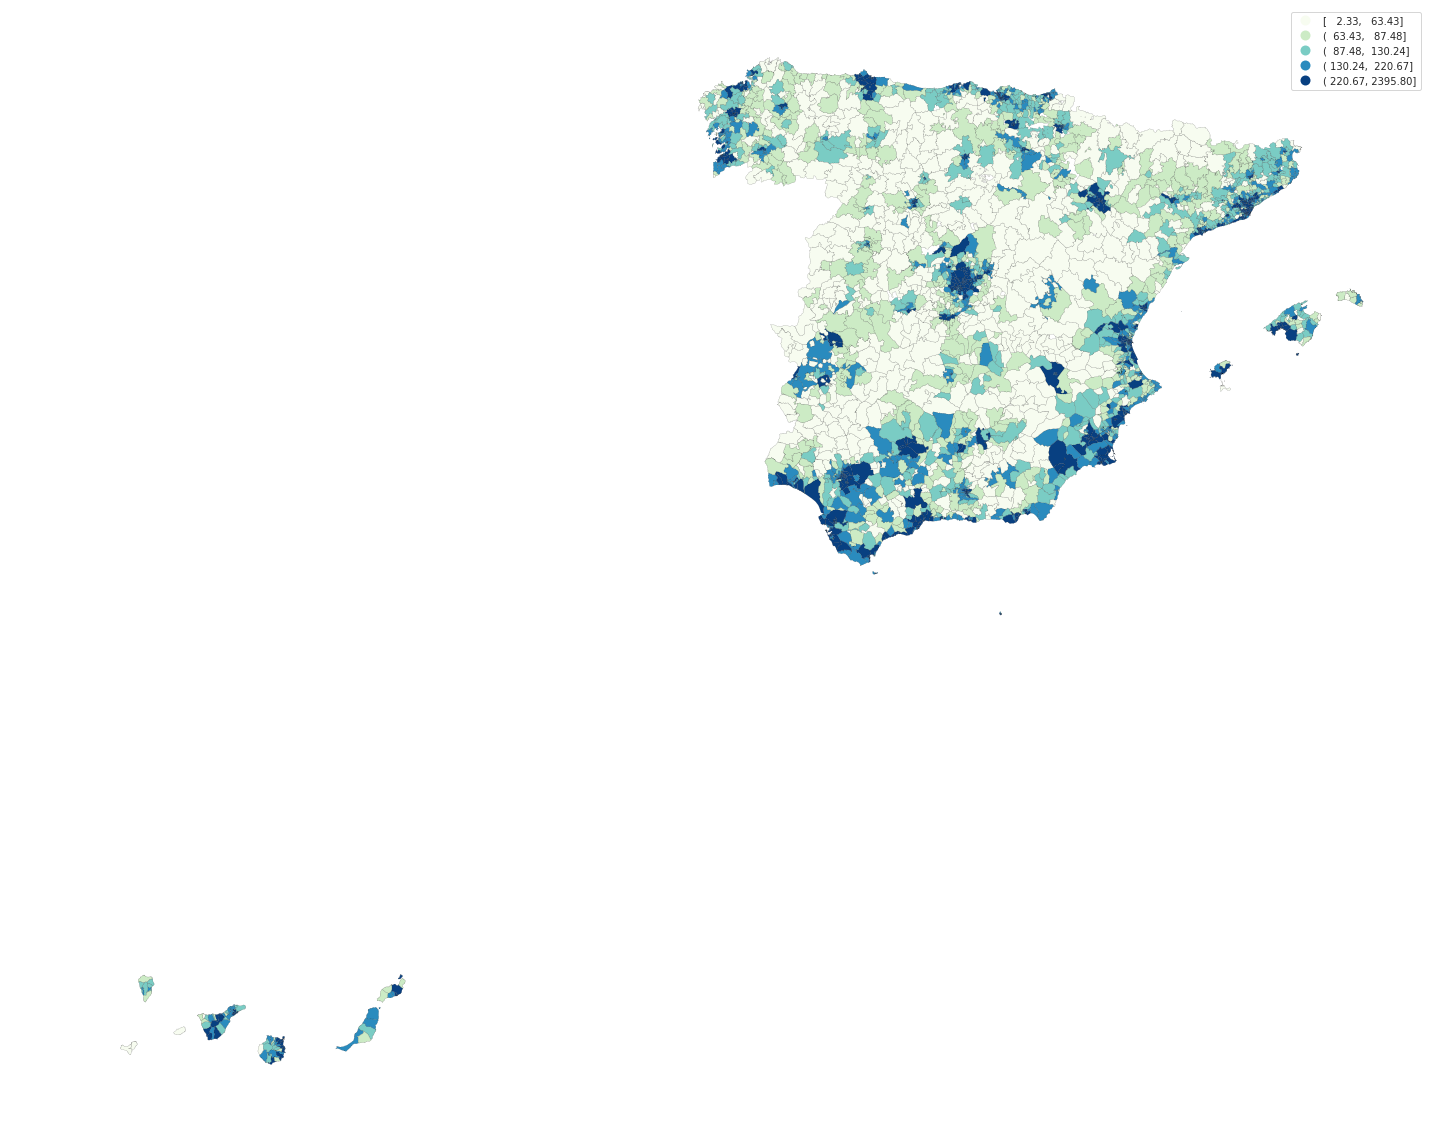

In [60]:
generate_map_plot_fn(results_gdf, 'gnn-q-gm-MAE')

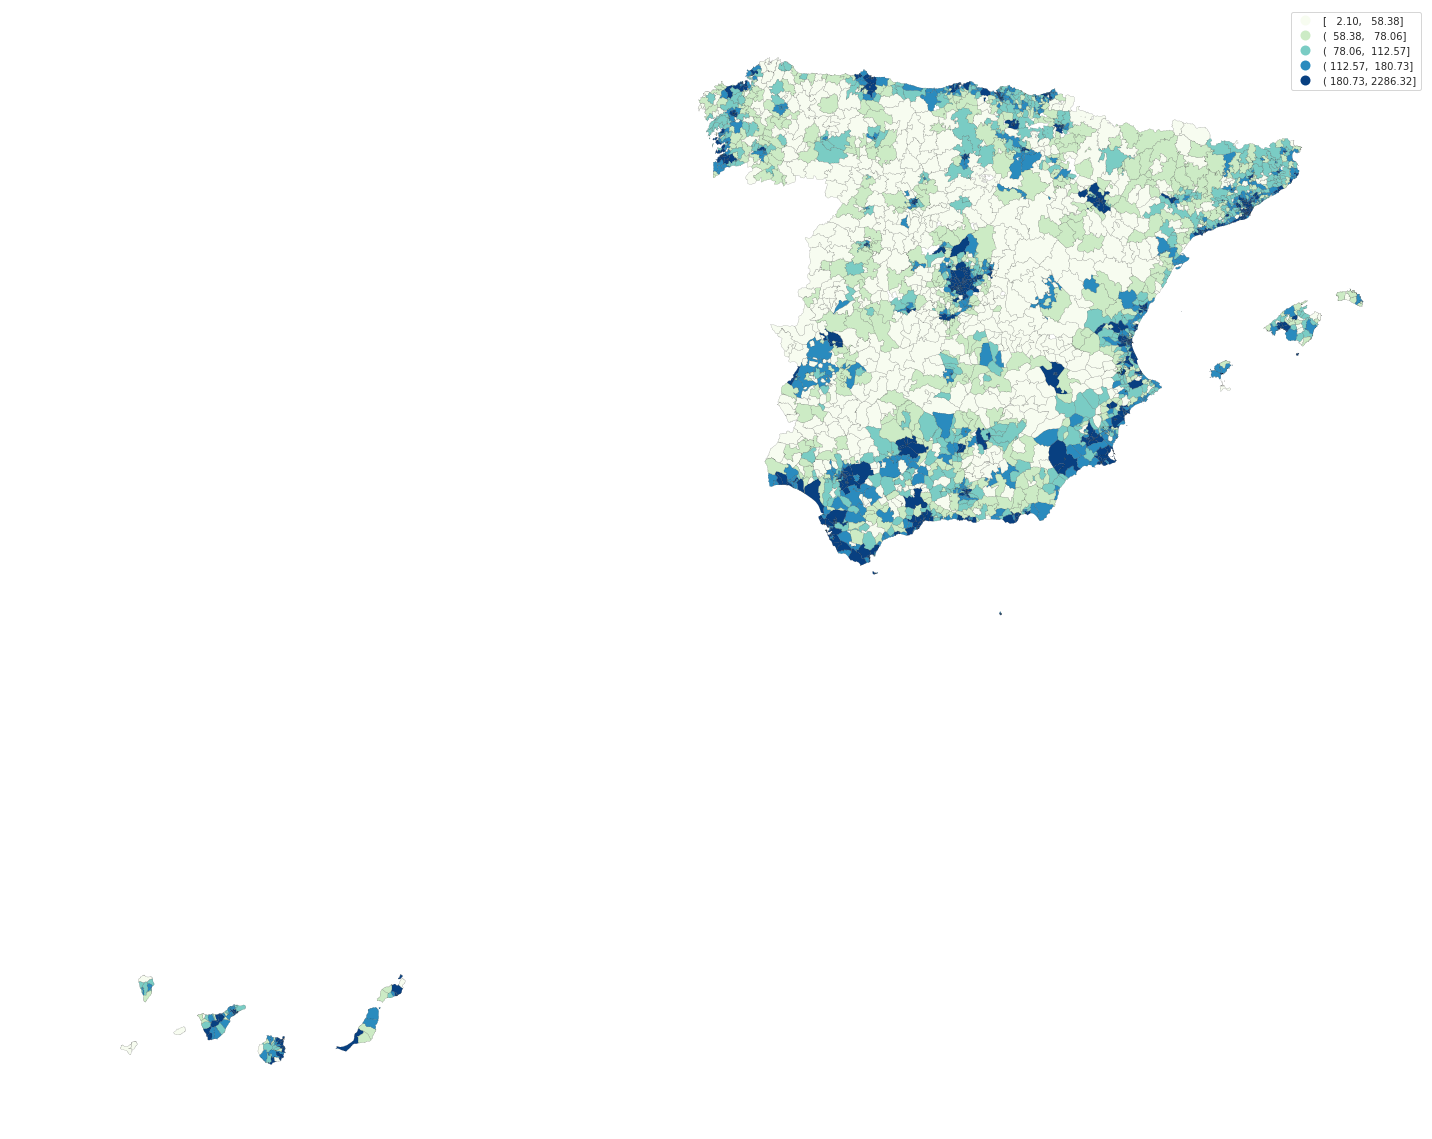

In [60]:
generate_map_plot_fn(results_gdf, 'gnn-gm-MAE')

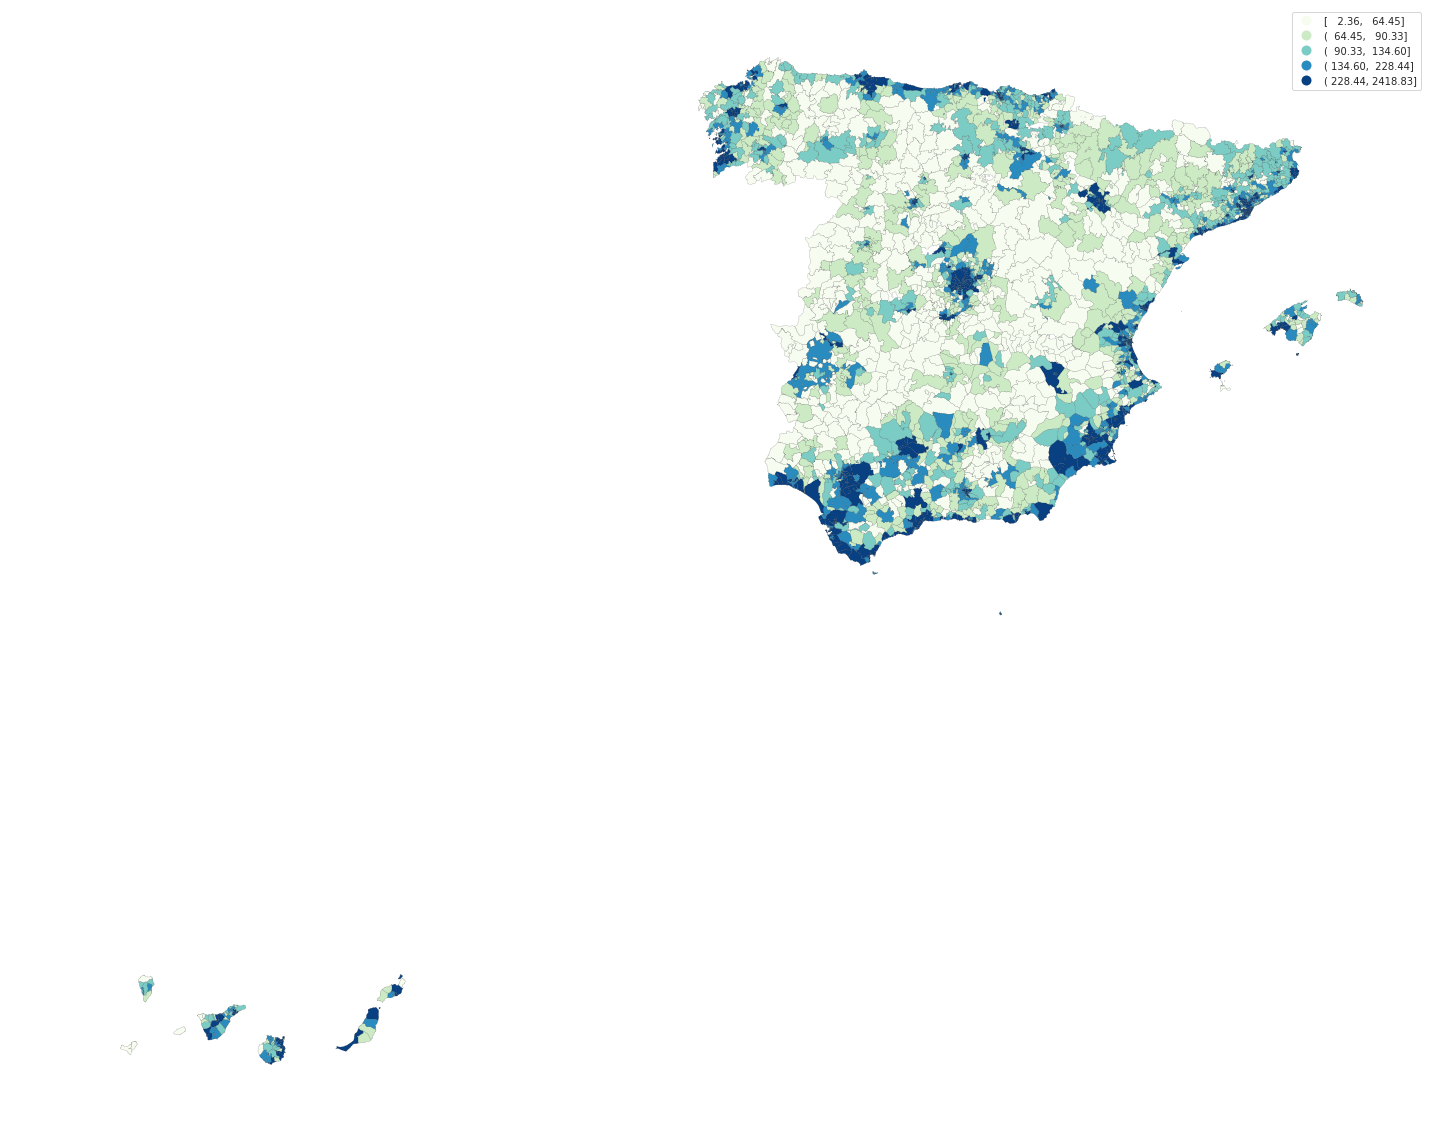

In [61]:
generate_map_plot_fn(results_gdf, 'gnn-ylag-MAE')

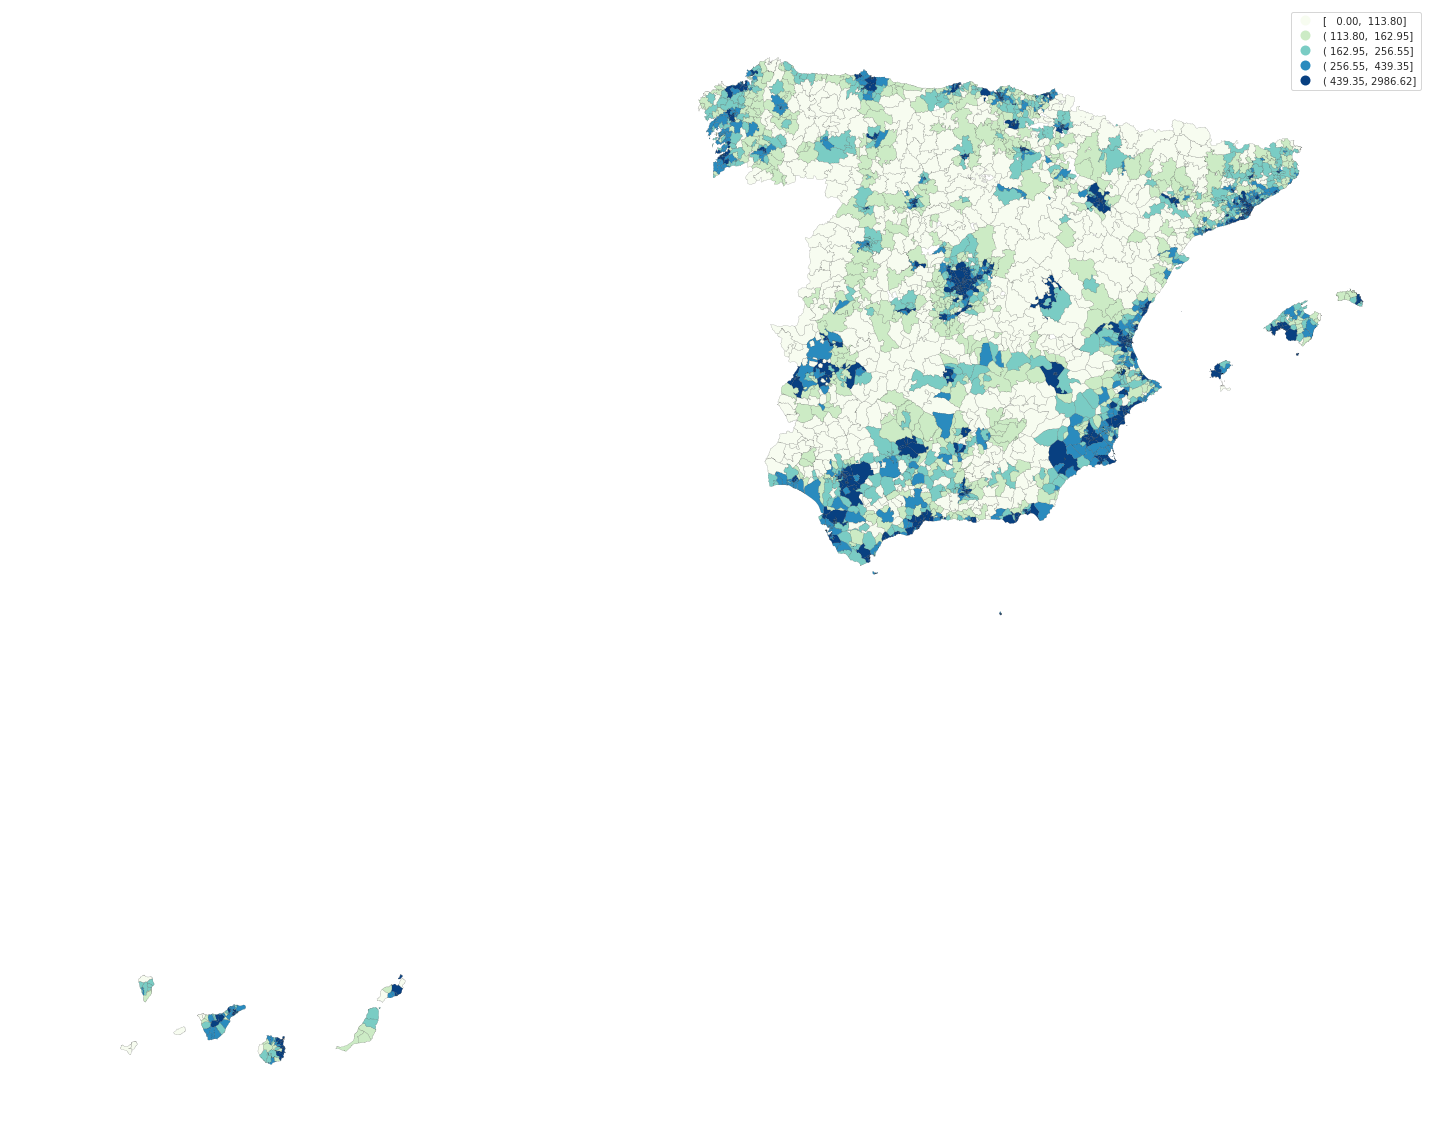

In [62]:
generate_map_plot_fn(results_gdf, 'lstm-MAE')

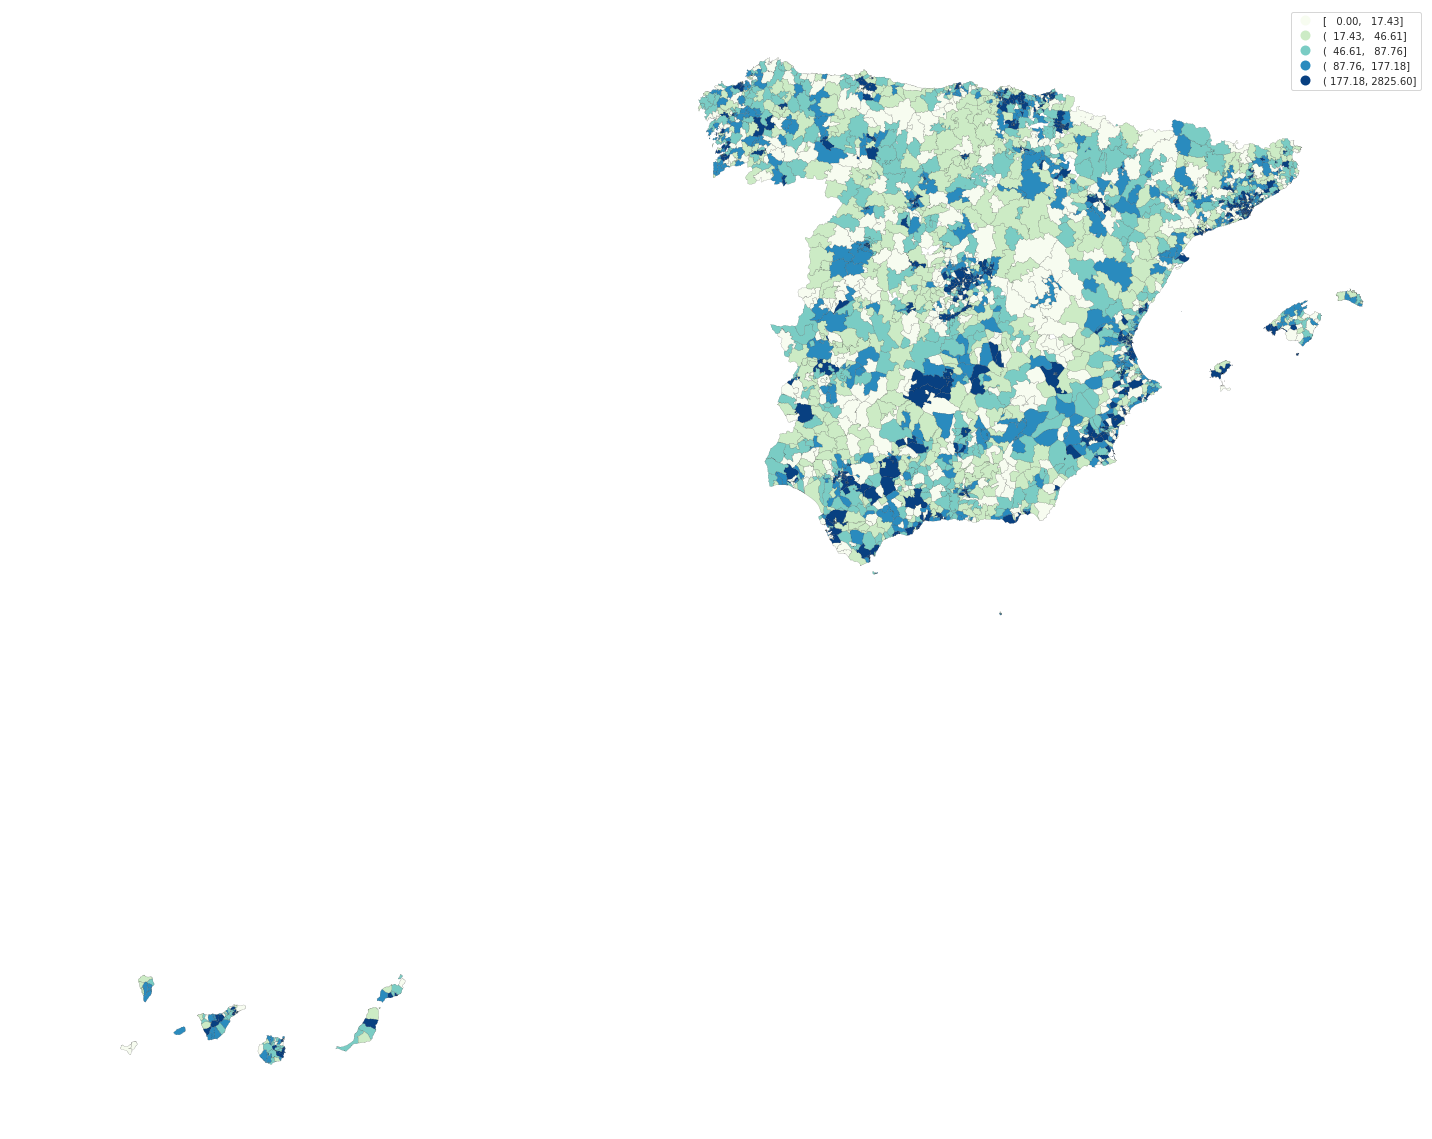

In [63]:
generate_map_plot_fn(results_gdf, 'arima-MAE')

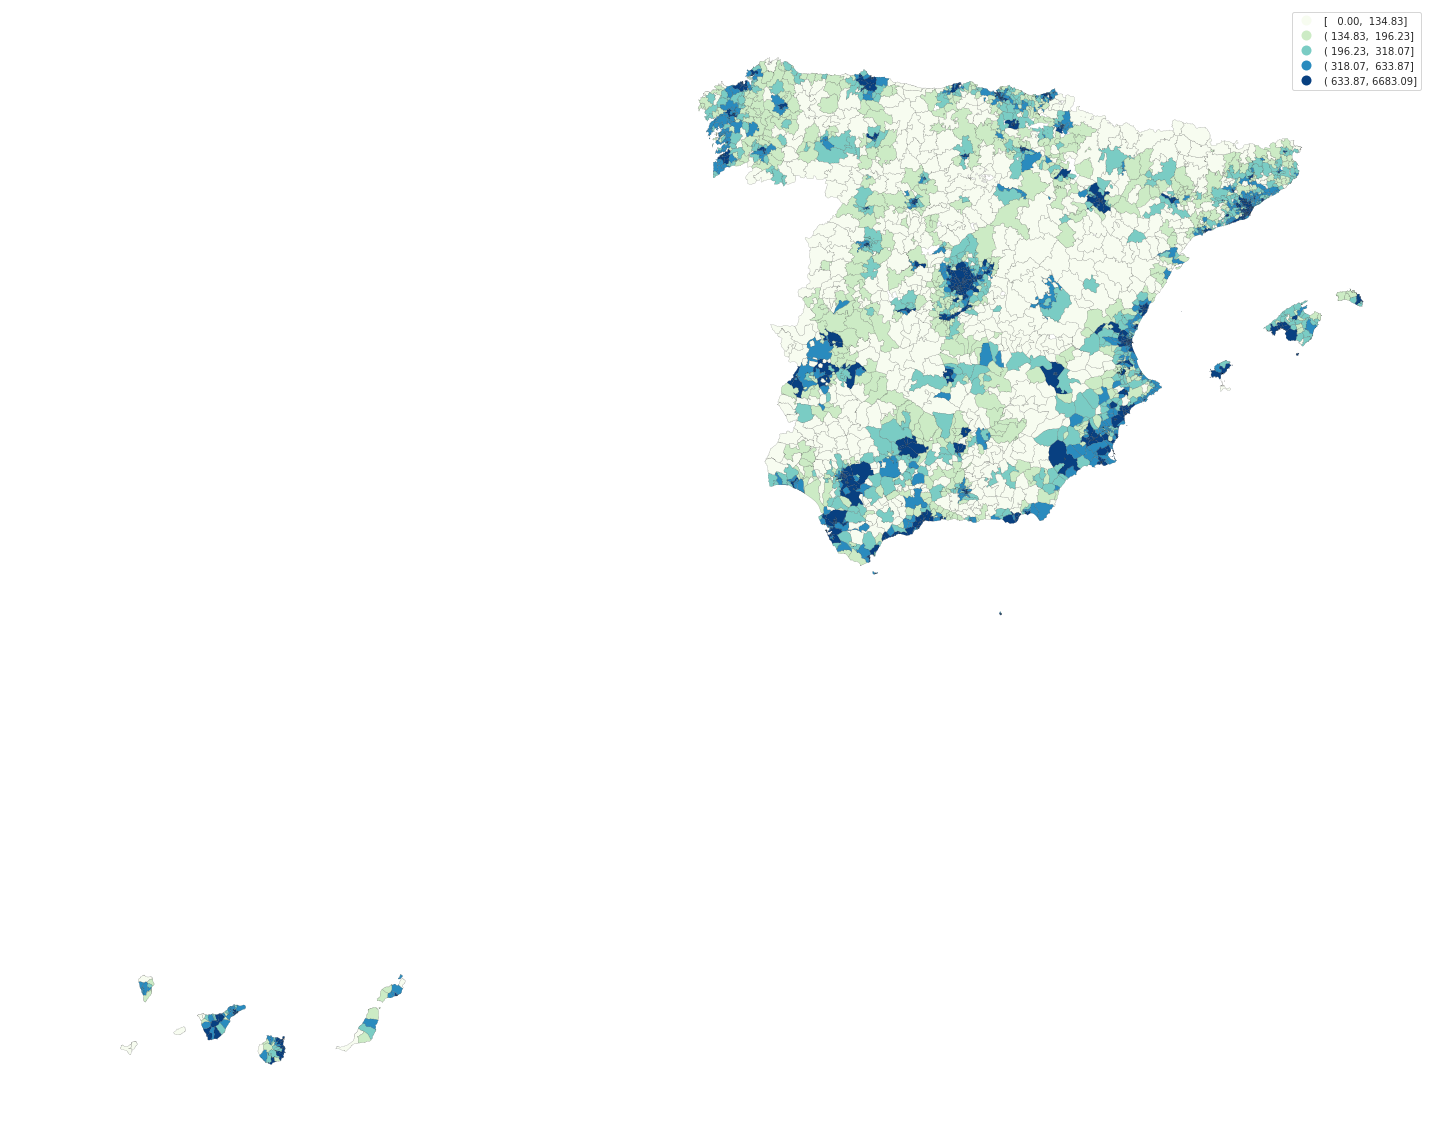

In [64]:
generate_map_plot_fn(results_gdf, 'naive-MAE')

### Madrid results

In [65]:
mad_zones_id = mad_zones.index.tolist()

In [66]:
len(mad_zones_id)

361

In [67]:
madrid_results = results_gdf[results_gdf.index.isin(mad_zones_id)]

In [68]:
madrid_results.shape

(43, 27)

In [69]:
madrid_results.head()

Unnamed: 0  gnn-MAE     gnn-MSE  gnn-RMSE  naive-MAE    naive-MSE  \
area_id                                                                      
2800601        1498 1490.720 3764966.586  1940.352   2919.844 12704463.028   
2800701        1499 1144.336 2416857.136  1554.624   2145.544  6776604.302   
2800702        1500  671.125  717336.447   846.957   1279.628  2584736.410   
28045          1526  438.925  355031.966   595.846    878.350  1245383.452   
2804901        1529  414.343  309258.316   556.110    712.131   896270.988   

         naive-RMSE  gnn-cont-MAE  gnn-cont-MSE  gnn-cont-RMSE  ...  \
area_id                                                         ...   
2800601    3564.332      1150.458   2265669.667       1505.214  ...   
2800701    2603.191       888.156   1620469.640       1272.977  ...   
2800702    1607.712       464.040    331632.043        575.875  ...   
28045      1115.967       289.711    152785.624        390.878  ...   
2804901     946.716       264.750    128172.882        358.012  ...   

         gnn-ylag-MSE  gnn-ylag-RMSE  lstm-MAE    lstm-MSE  lstm-RMSE  \
area_id                                                                 
2800601   1480818.419       1216.889   986.985 1737589.241   1318.176   
2800701   1213573.922       1101.623   691.119  854809.960    924.559   
2800702    172878.369        415.786   606.599  618179.672    786.244   
28045       92260.934        303.745   651.074  741533.687    861.124   
2804901     93969.222        306.544   596.483  570501.472    755.315   

         arima-MAE  arima-MSE  arima-RMSE  total_trips  \
area_id                                                  
2800601    774.584 599980.108     774.584 39407374.528   
2800701    473.674 224367.173     473.674 27223901.753   
2800702     62.358   3888.549      62.358 19846572.482   
28045      174.717  30526.046     174.717 11840681.064   
2804901    200.644  40258.131     200.644 10551826.671   

                                                  geometry  
area_id                                                     
2800601  POLYGON ((446242.970 4484314.788, 445604.628 4...  
2800701  POLYGON ((427886.939 4465414.893, 427502.435 4...  
2800702  POLYGON ((431652.799 4466638.560, 431623.333 4...  
28045    POLYGON ((429684.220 4503234.770, 429862.537 4...  
2804901  POLYGON ((451599.289 4474155.805, 451325.974 4...  

[5 rows x 27 columns]

In [70]:
madrid_results.mean()

Unnamed: 0          1572.977
gnn-MAE             1359.917
gnn-MSE          4444186.548
gnn-RMSE            1786.397
naive-MAE           2671.277
naive-MSE       15166188.673
naive-RMSE          3345.884
gnn-cont-MAE        1052.161
gnn-cont-MSE     2918039.789
gnn-cont-RMSE       1394.670
gnn-gm-MAE           741.815
gnn-gm-MSE       1686358.430
gnn-gm-RMSE         1044.382
gnn-q-gm-MAE         768.440
gnn-q-gm-MSE     1880814.838
gnn-q-gm-RMSE       1118.125
gnn-ylag-MAE         843.132
gnn-ylag-MSE     2039444.939
gnn-ylag-RMSE       1149.429
lstm-MAE            1097.265
lstm-MSE         2797297.316
lstm-RMSE           1479.754
arima-MAE            466.074
arima-MSE         524432.861
arima-RMSE           466.074
total_trips     38200640.895
dtype: float64

In [71]:
madrid_results.std()

Unnamed: 0            34.056
gnn-MAE              847.114
gnn-MSE          4970360.702
gnn-RMSE            1132.610
naive-MAE           1594.963
naive-MSE       14996578.607
naive-RMSE          2016.384
gnn-cont-MAE         727.248
gnn-cont-MSE     3915474.521
gnn-cont-RMSE        998.049
gnn-gm-MAE           518.773
gnn-gm-MSE       2615961.866
gnn-gm-RMSE          780.900
gnn-q-gm-MAE         510.409
gnn-q-gm-MSE     2776988.970
gnn-q-gm-RMSE        803.508
gnn-ylag-MAE         592.369
gnn-ylag-MSE     3061727.704
gnn-ylag-RMSE        857.531
lstm-MAE             562.154
lstm-MSE         2716152.251
lstm-RMSE            788.729
arima-MAE            560.823
arima-MSE        1296747.283
arima-RMSE           560.823
total_trips     21552707.439
dtype: float64

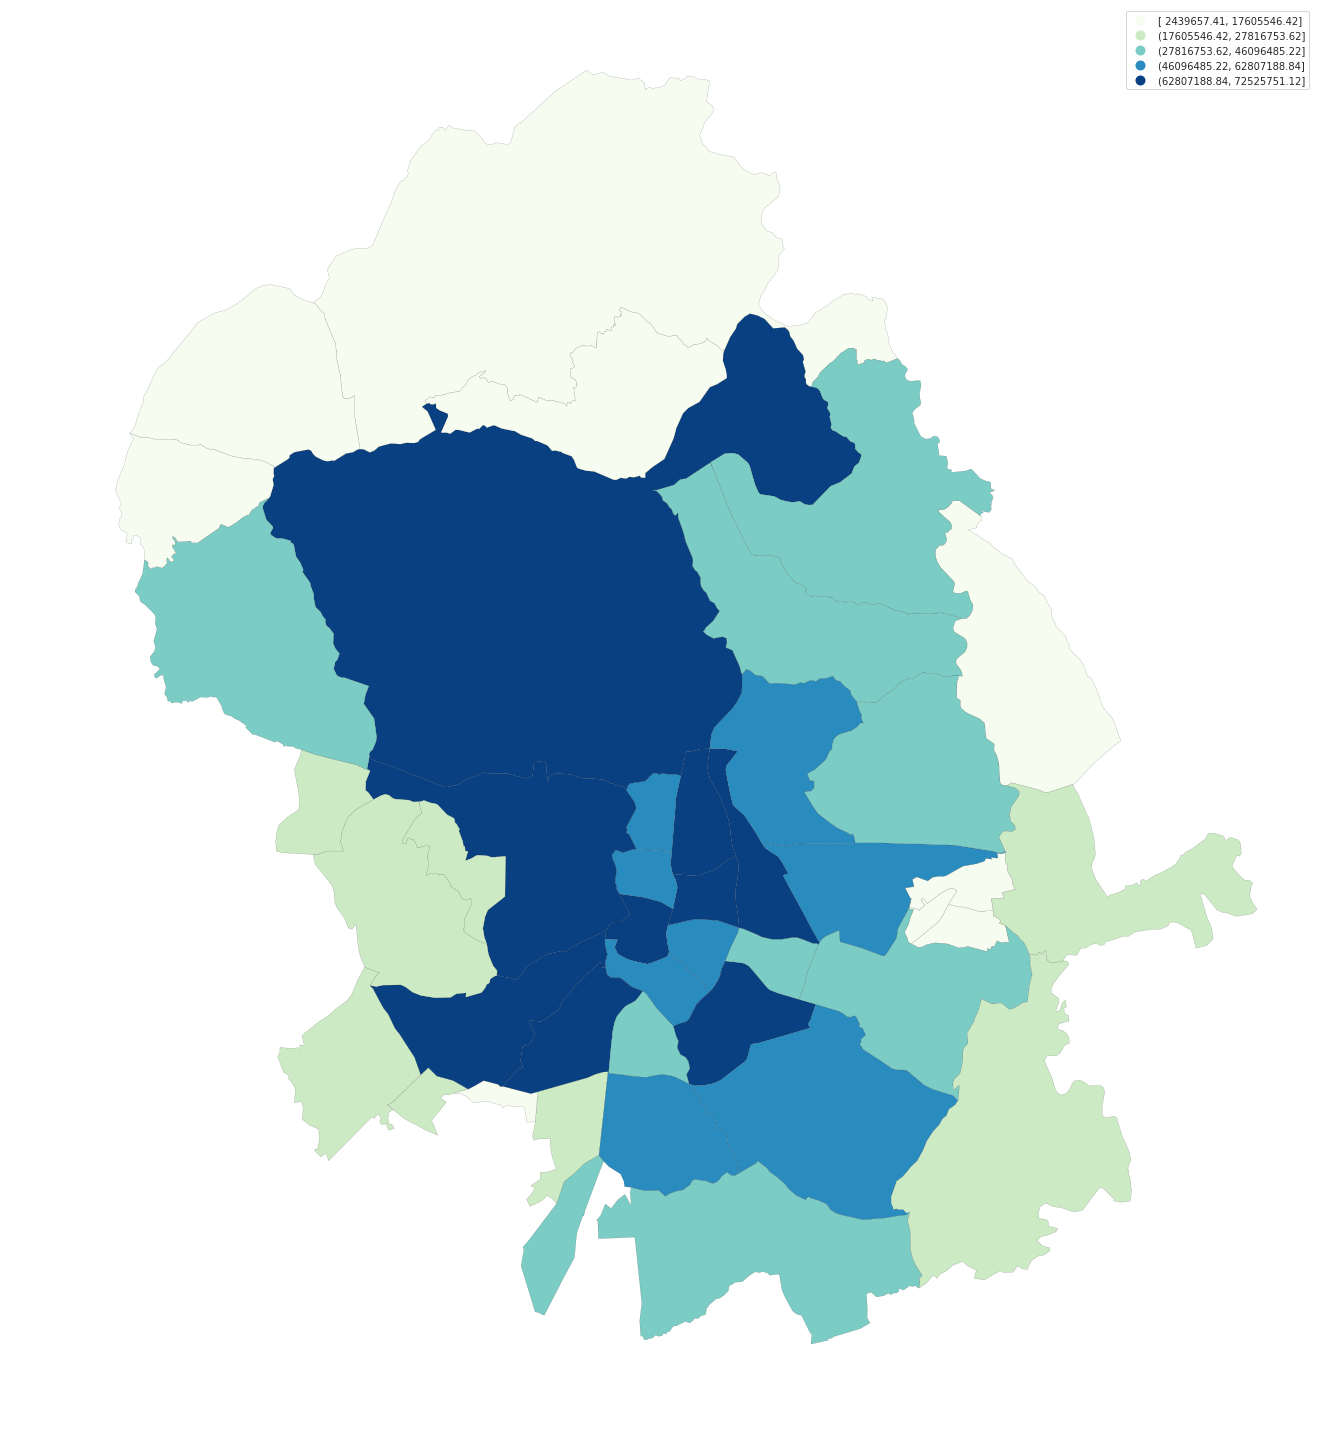

In [96]:
generate_map_plot_fn(madrid_results, 'total_trips')

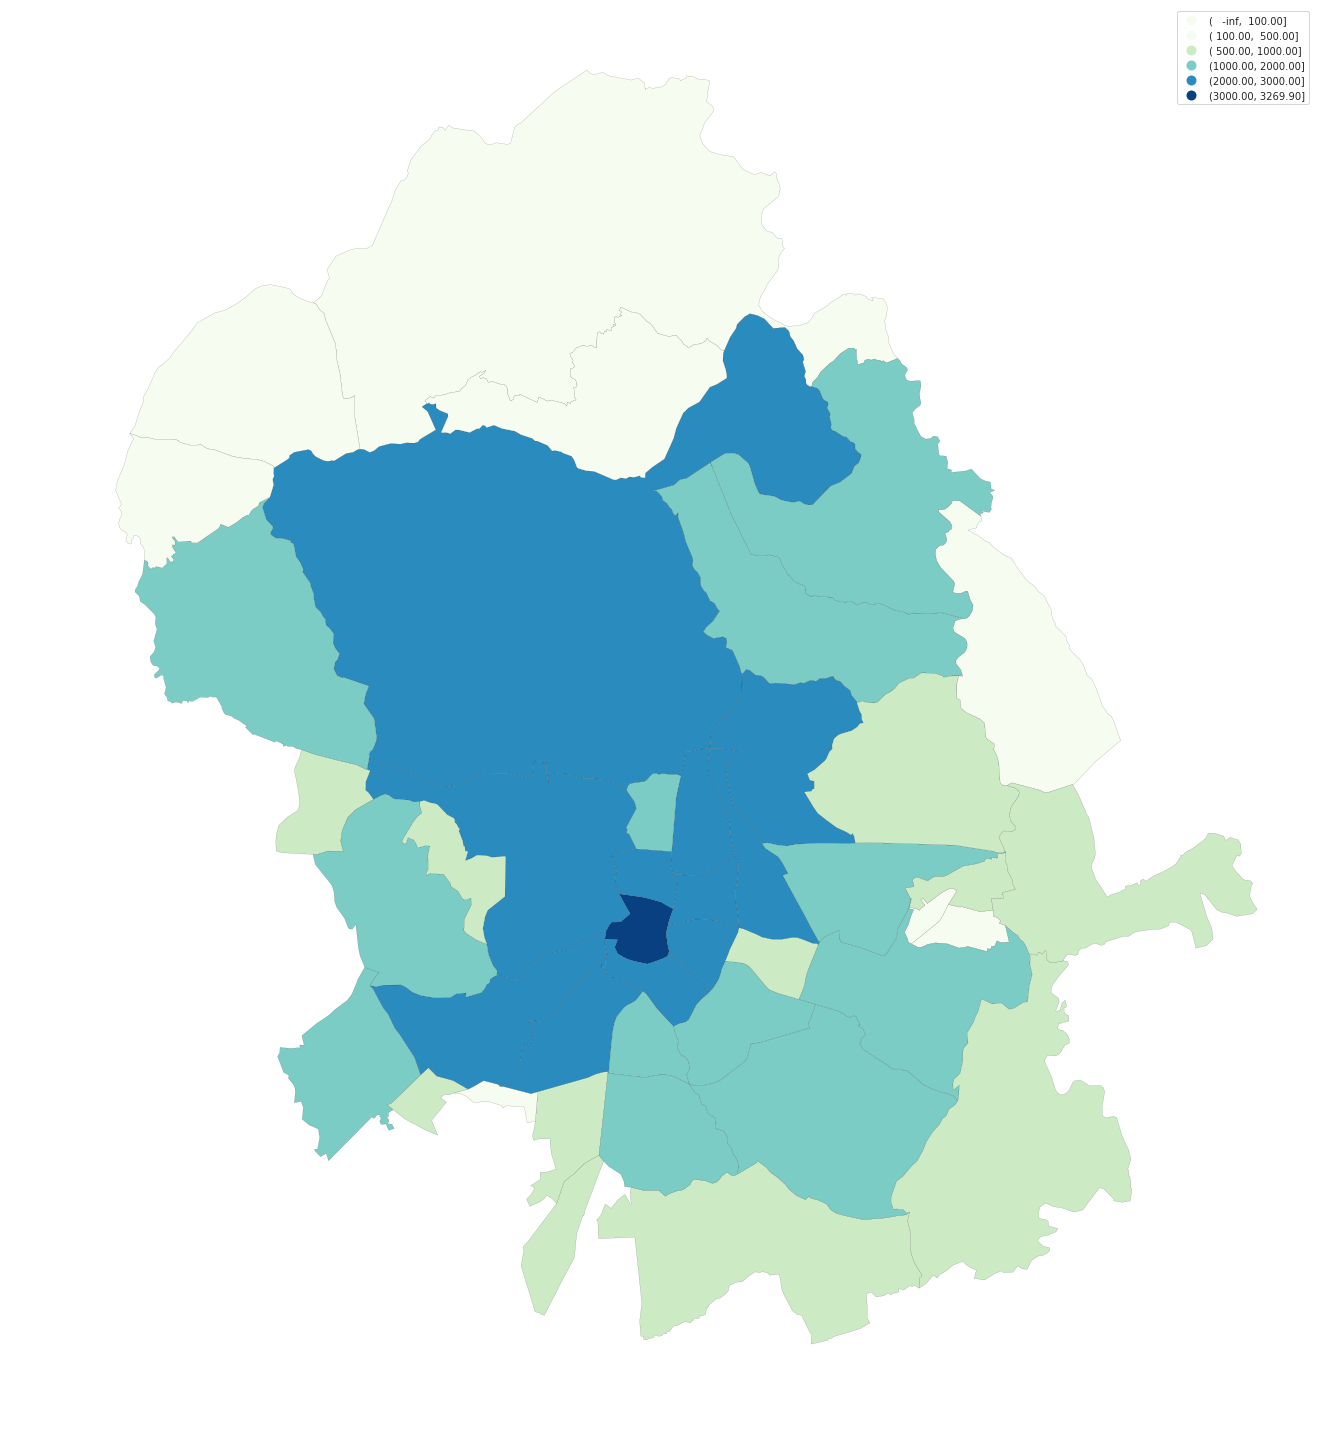

In [73]:
generate_map_plot_fn(madrid_results, 'gnn-MAE', scheme='user_defined')

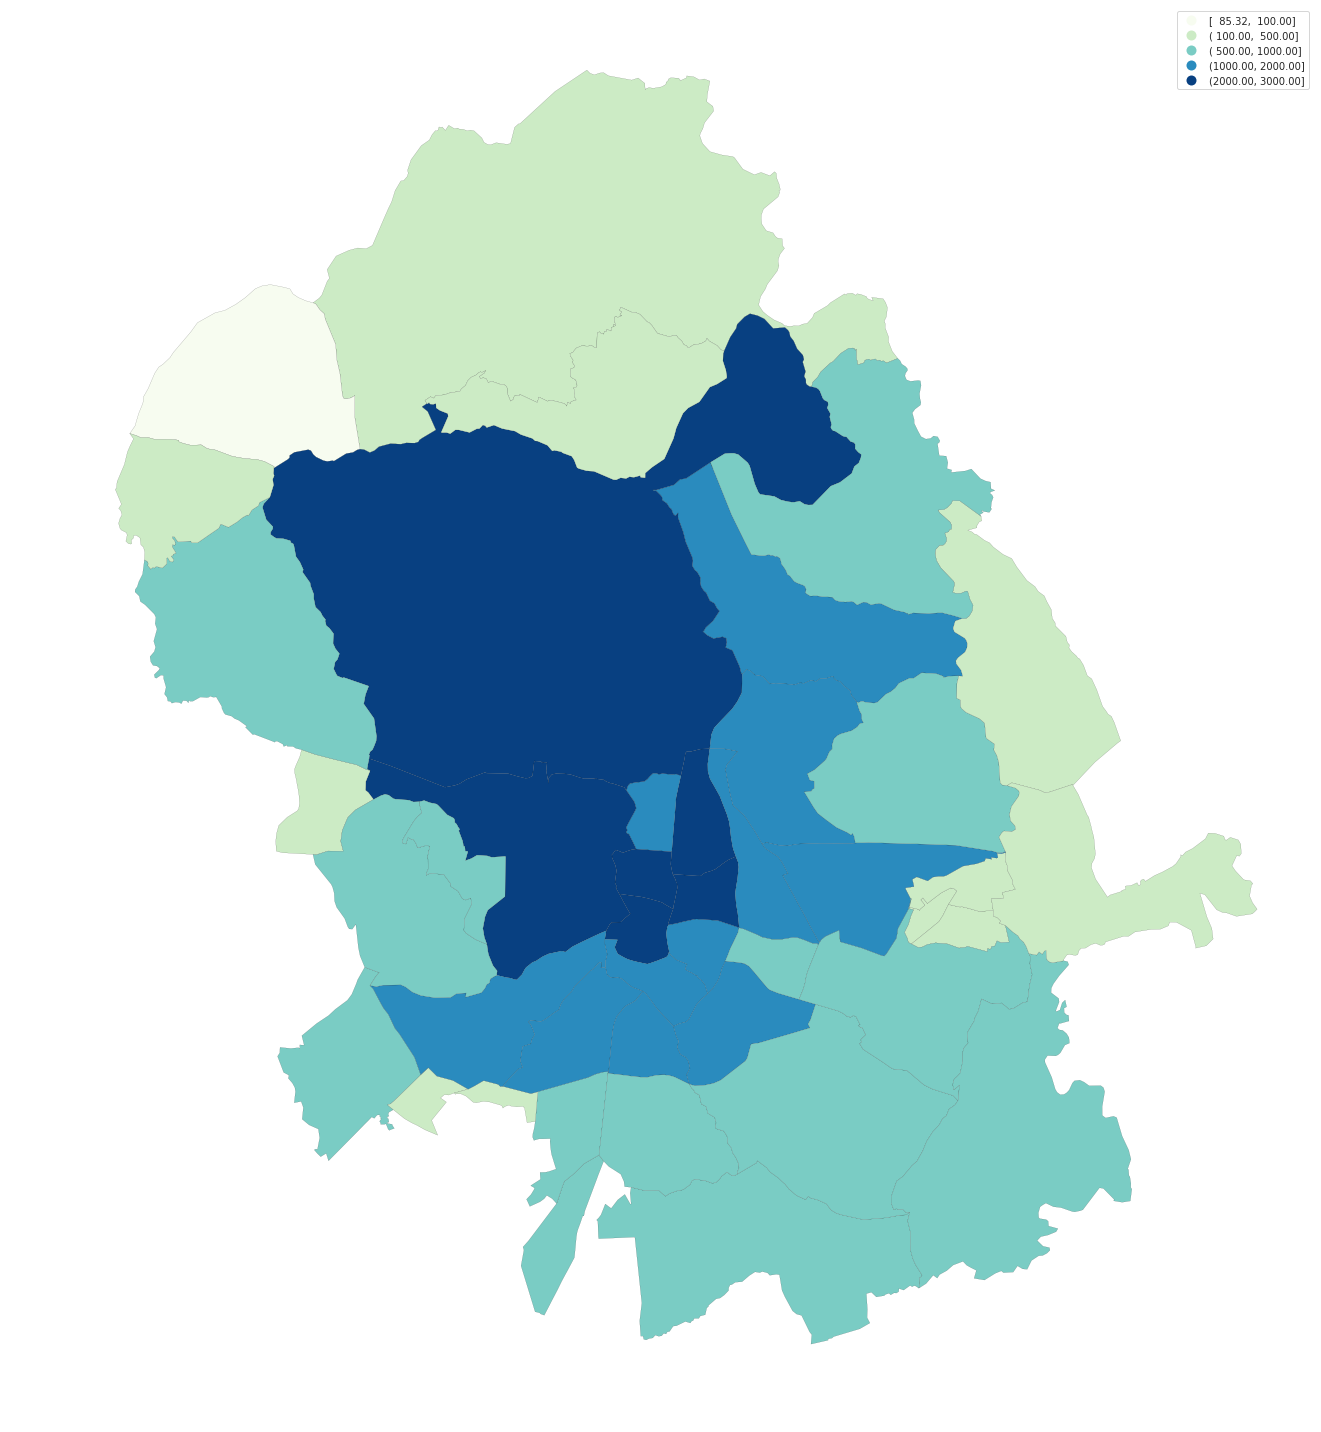

In [74]:
generate_map_plot_fn(madrid_results, 'gnn-cont-MAE', scheme='user_defined')

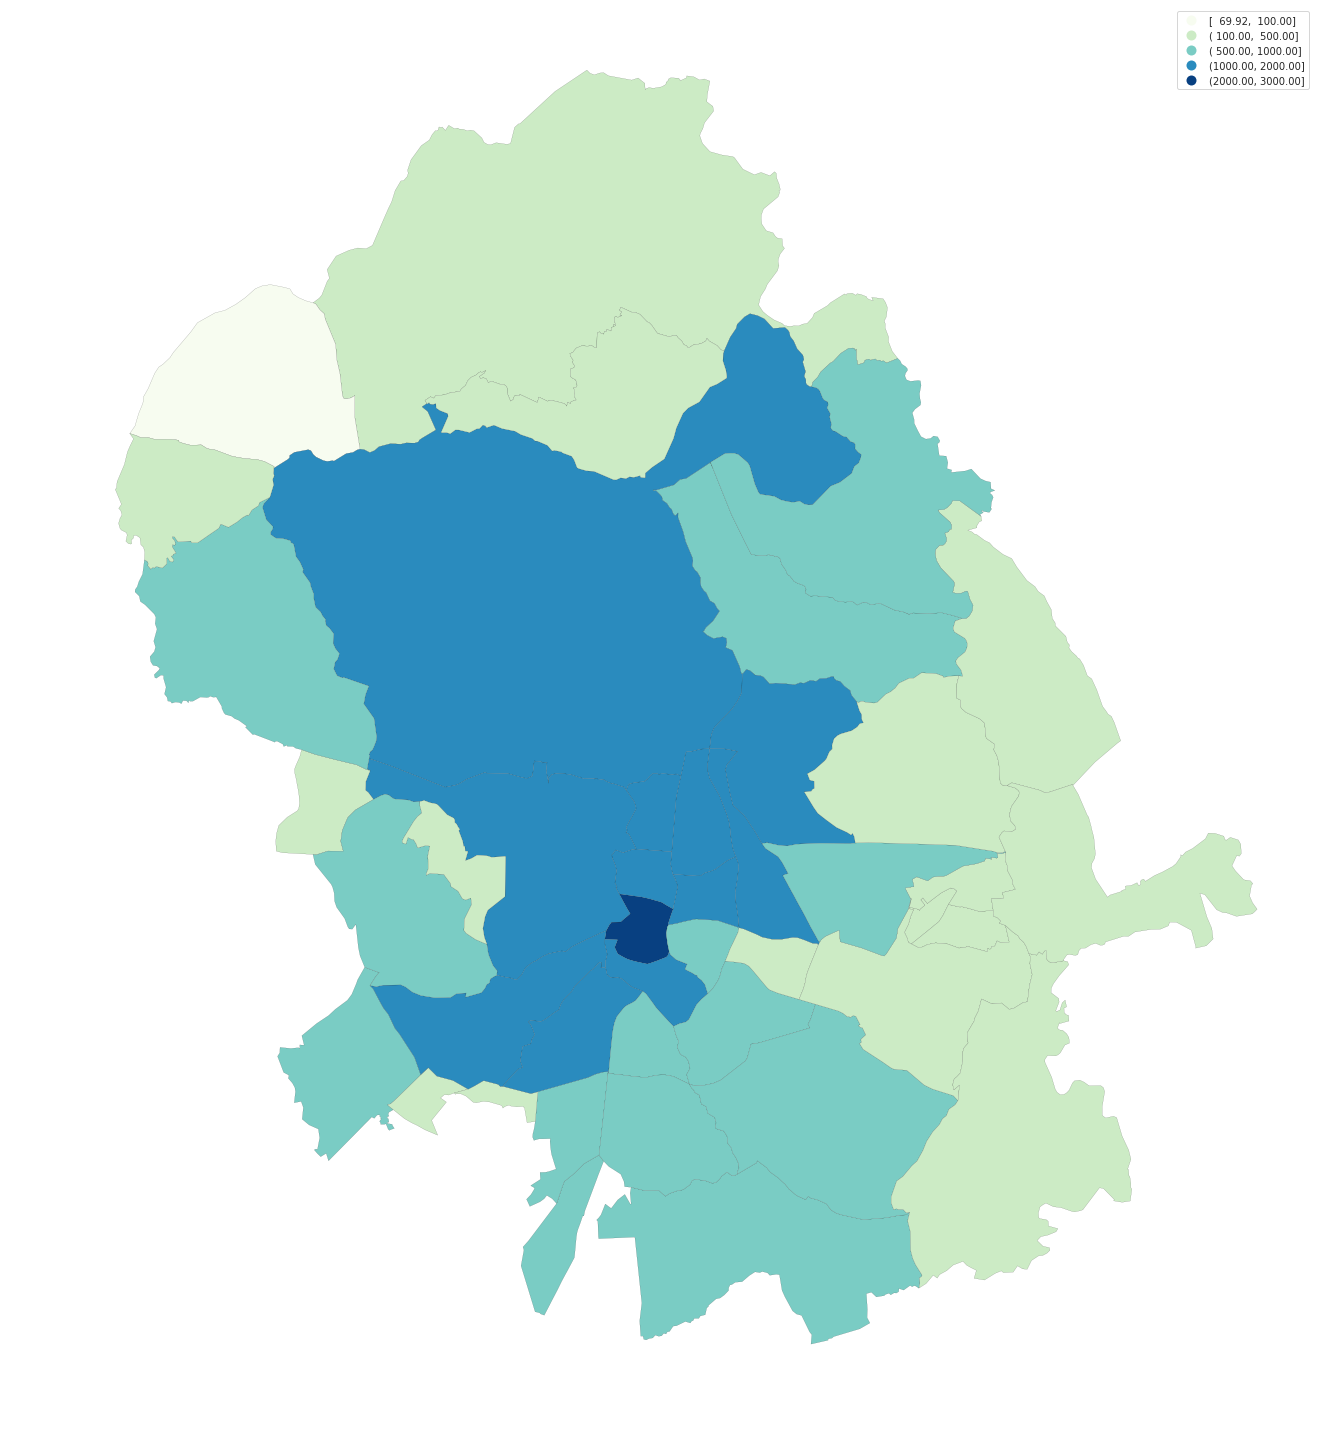

In [75]:
generate_map_plot_fn(madrid_results, 'gnn-gm-MAE', scheme='user_defined')

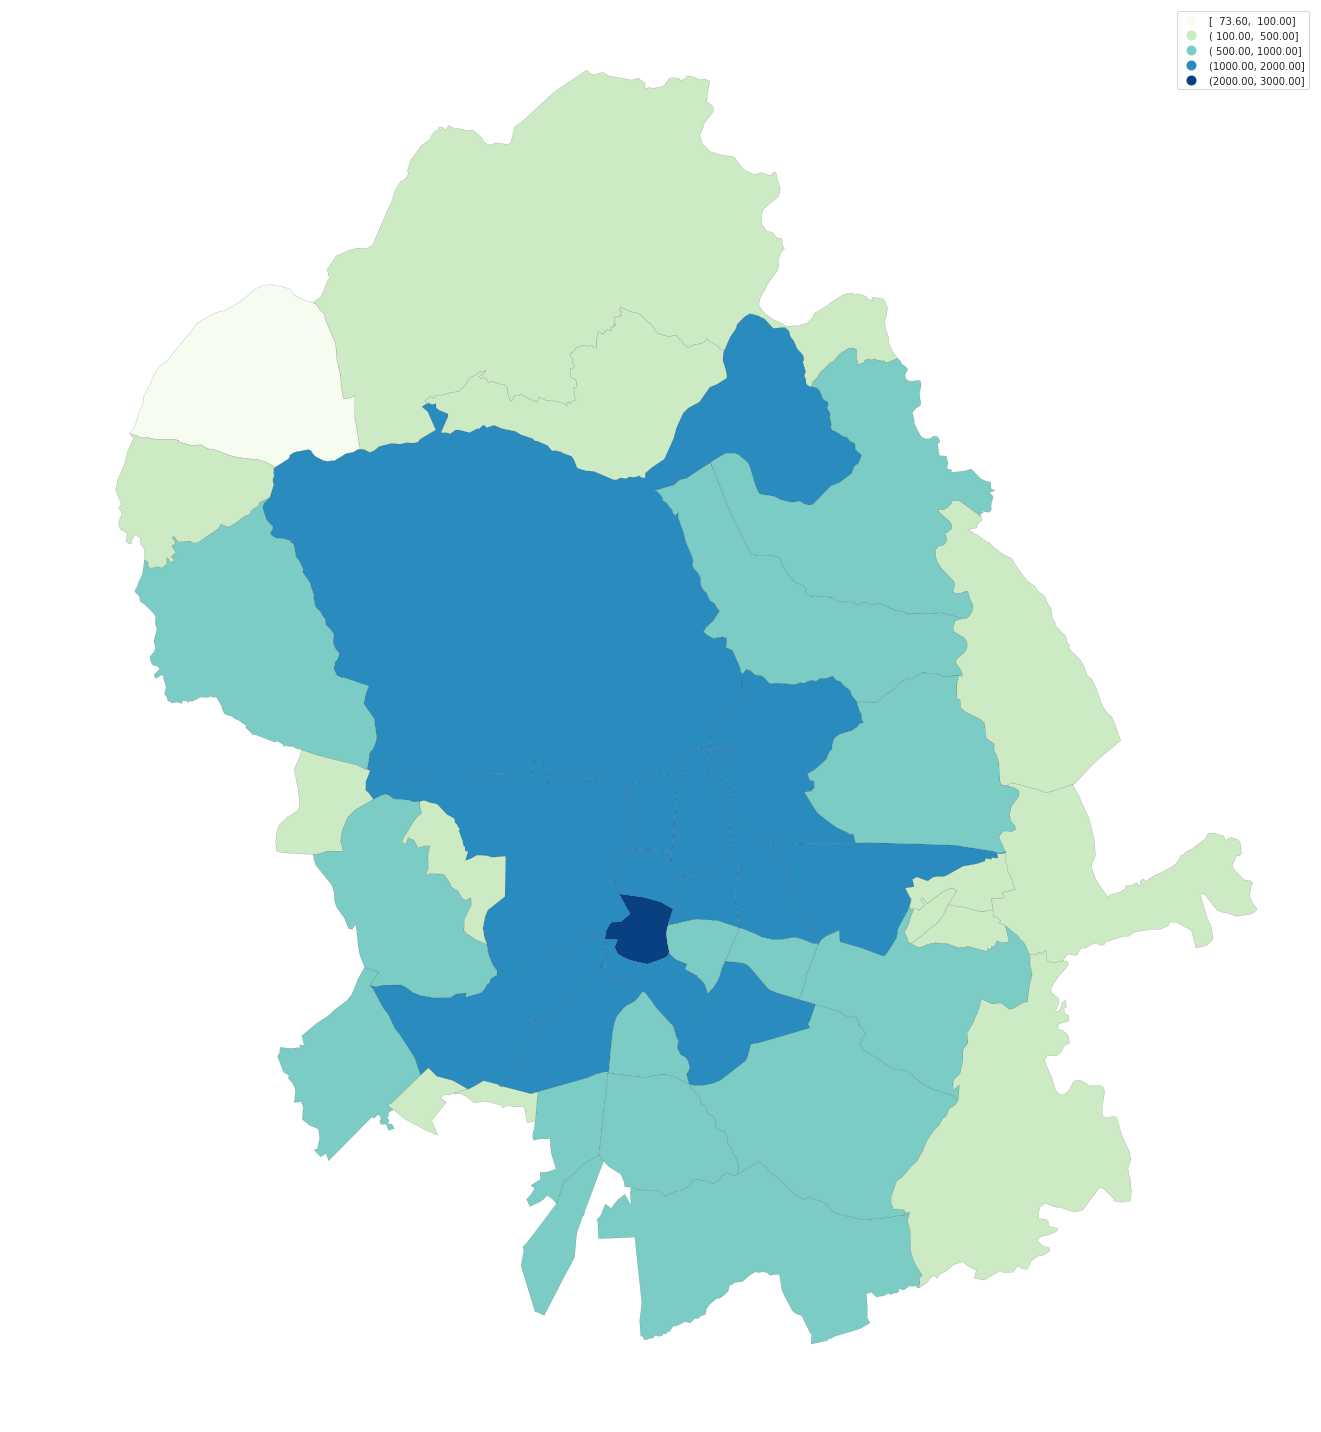

In [94]:
generate_map_plot_fn(madrid_results, 'gnn-q-gm-MAE', scheme='user_defined')

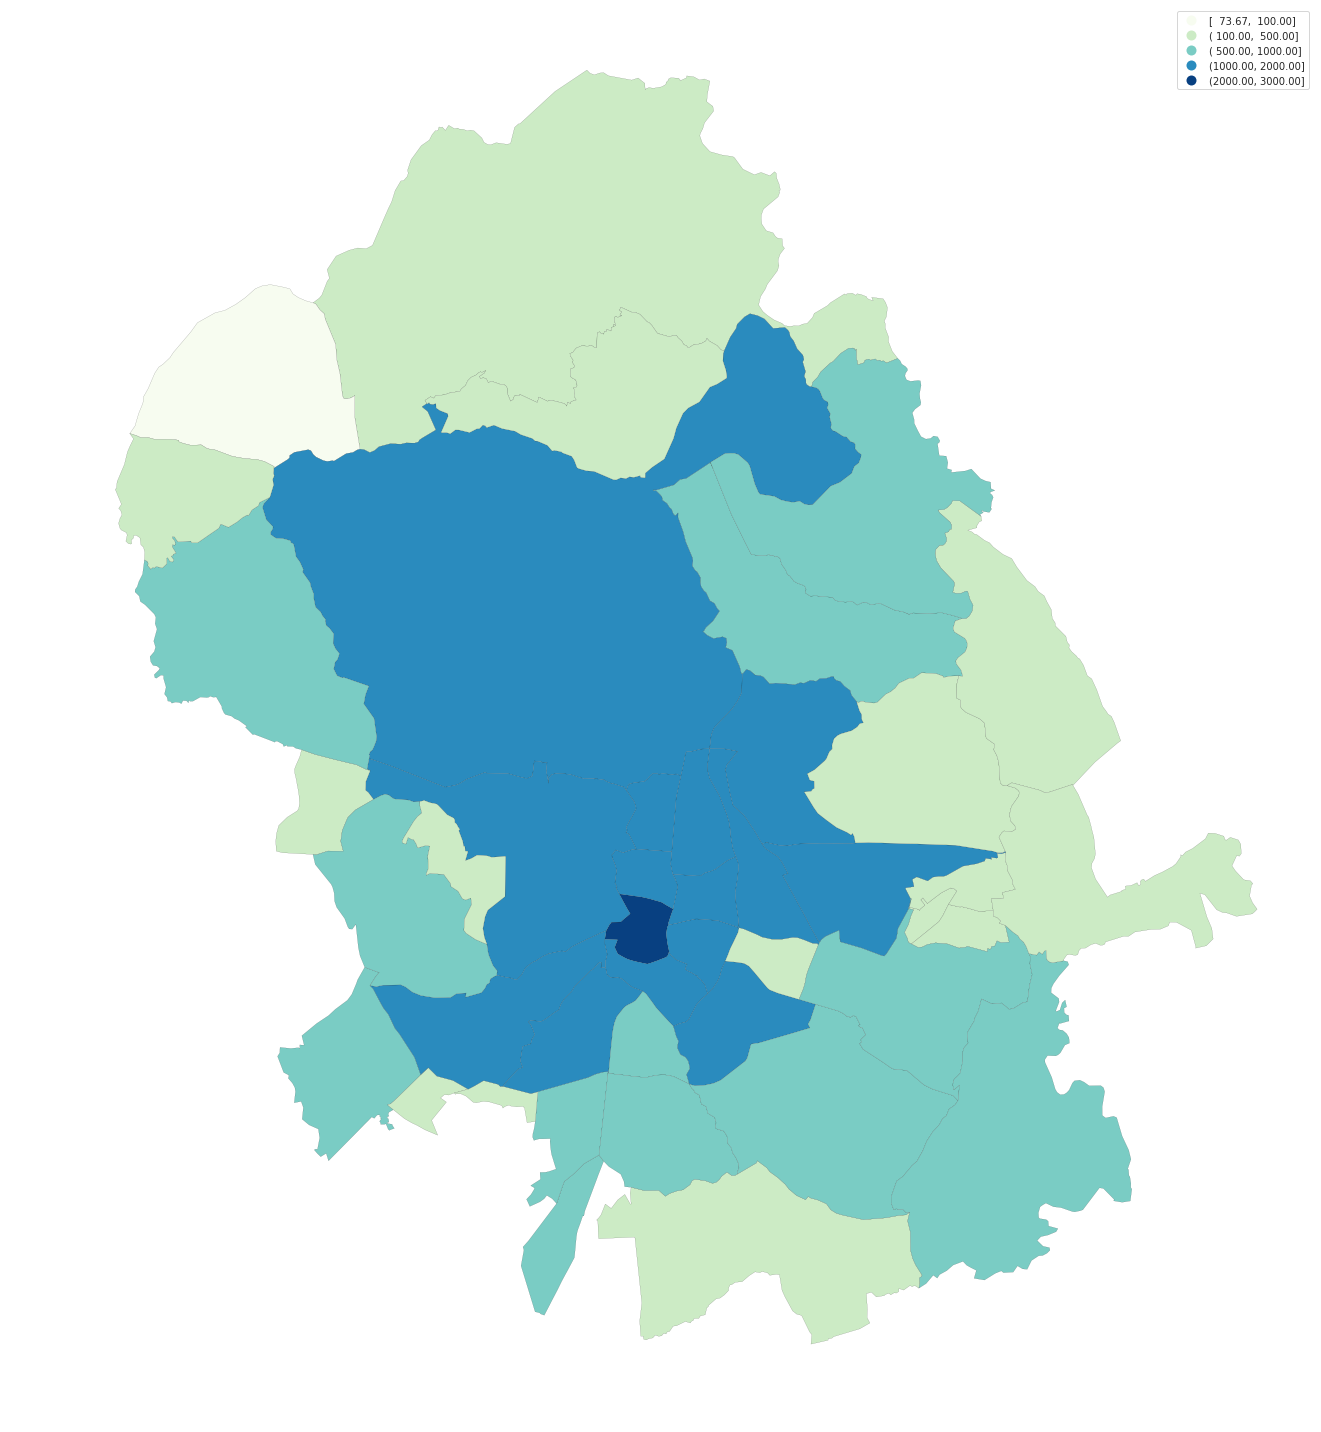

In [76]:
generate_map_plot_fn(madrid_results, 'gnn-ylag-MAE', scheme='user_defined')

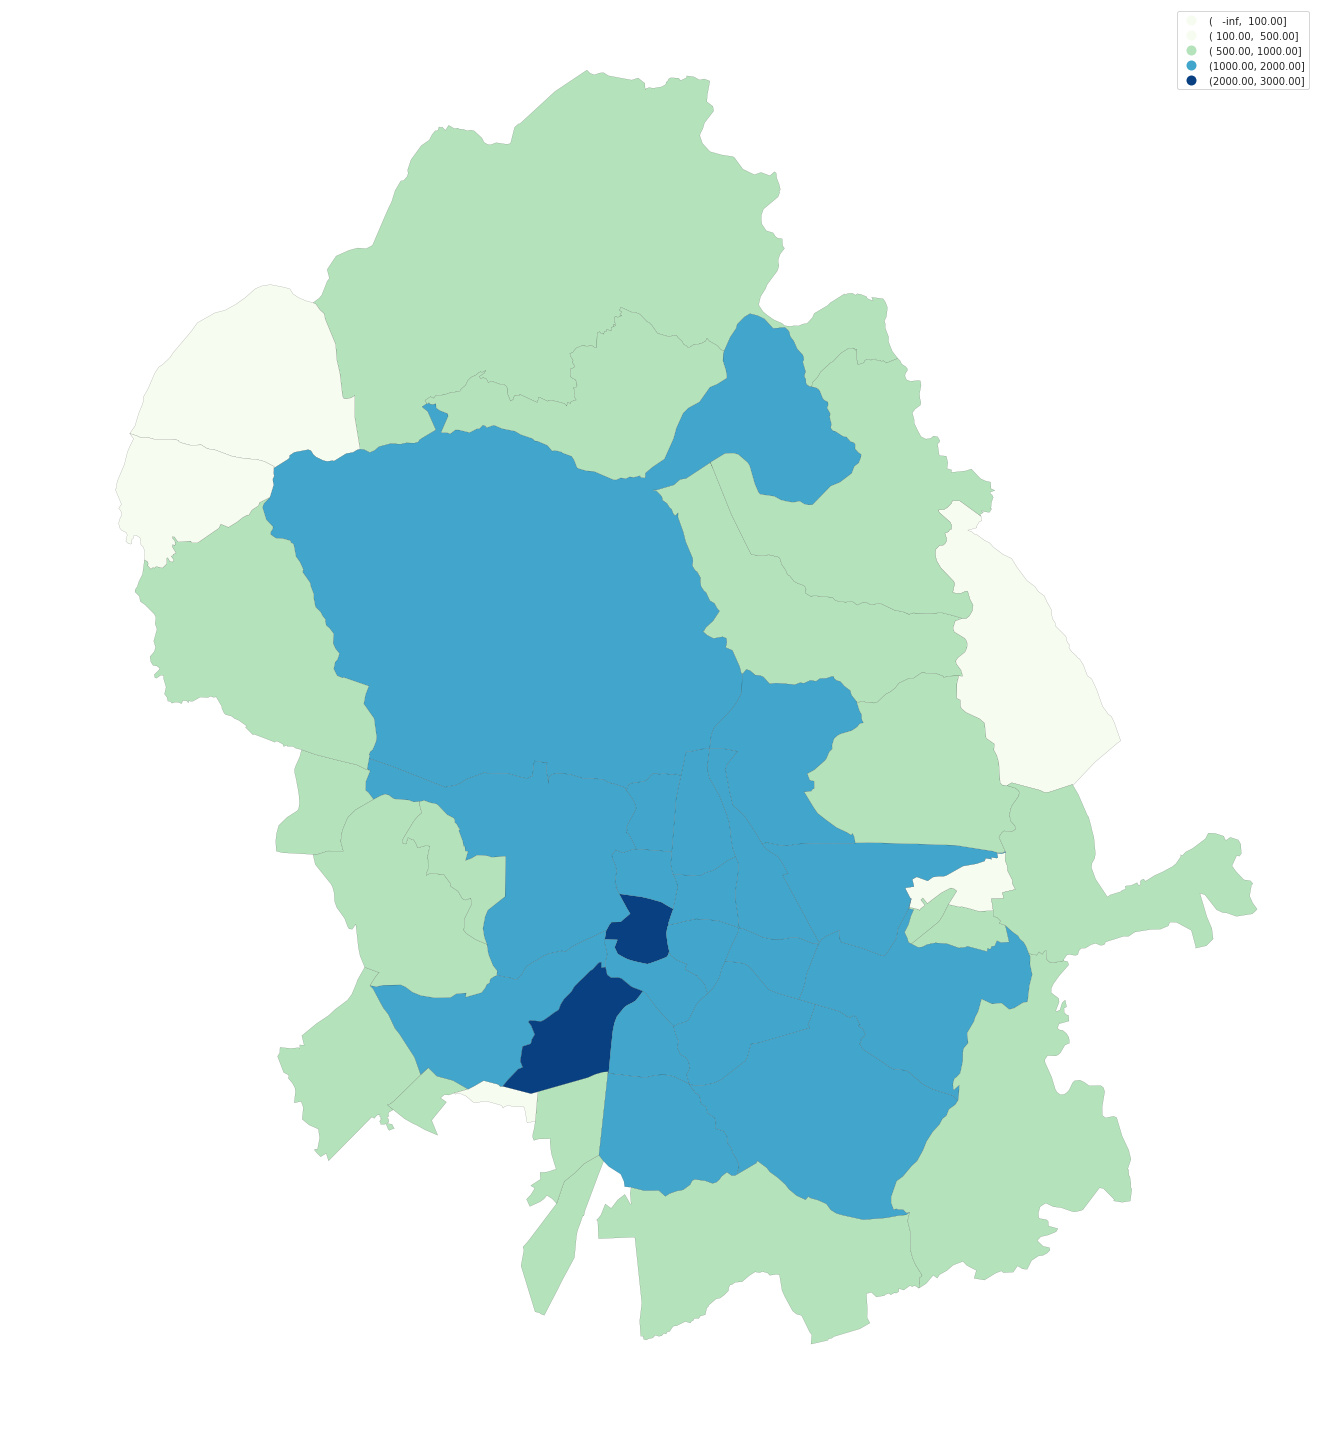

In [77]:
generate_map_plot_fn(madrid_results, 'lstm-MAE', scheme='user_defined')

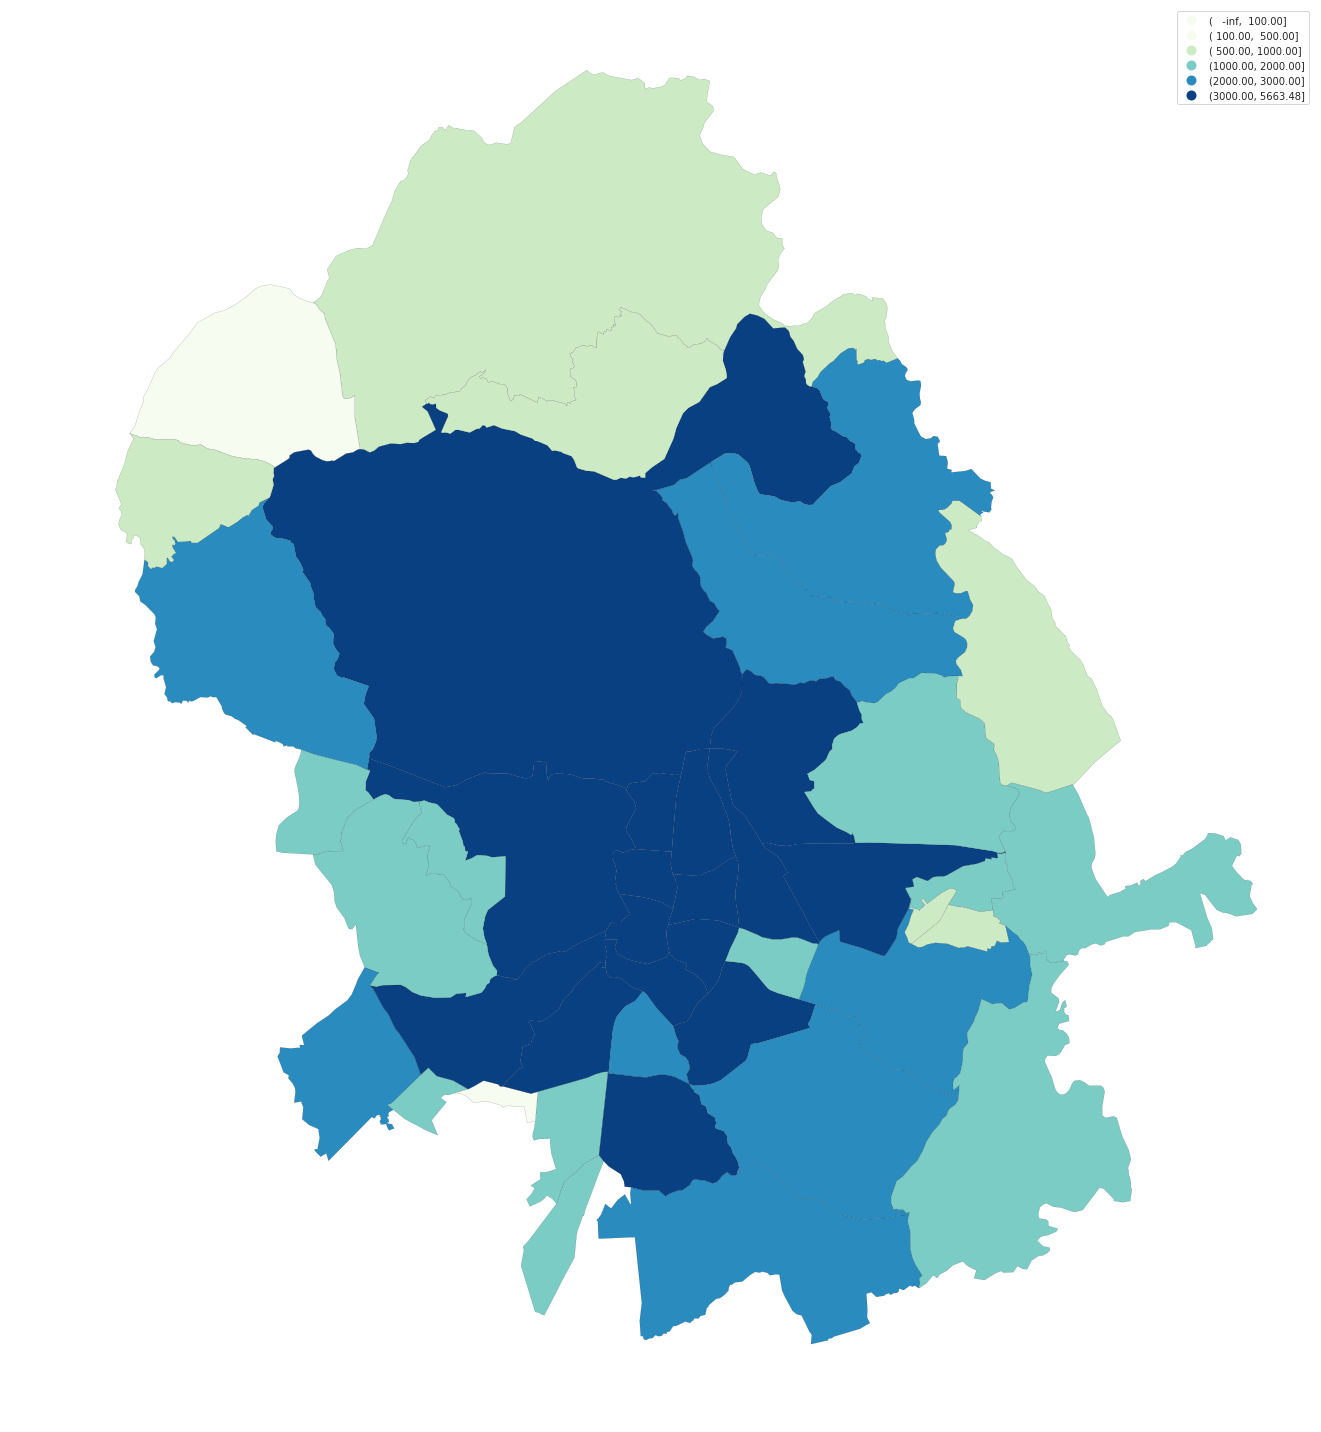

In [78]:
generate_map_plot_fn(madrid_results, 'naive-MAE', scheme='user_defined')

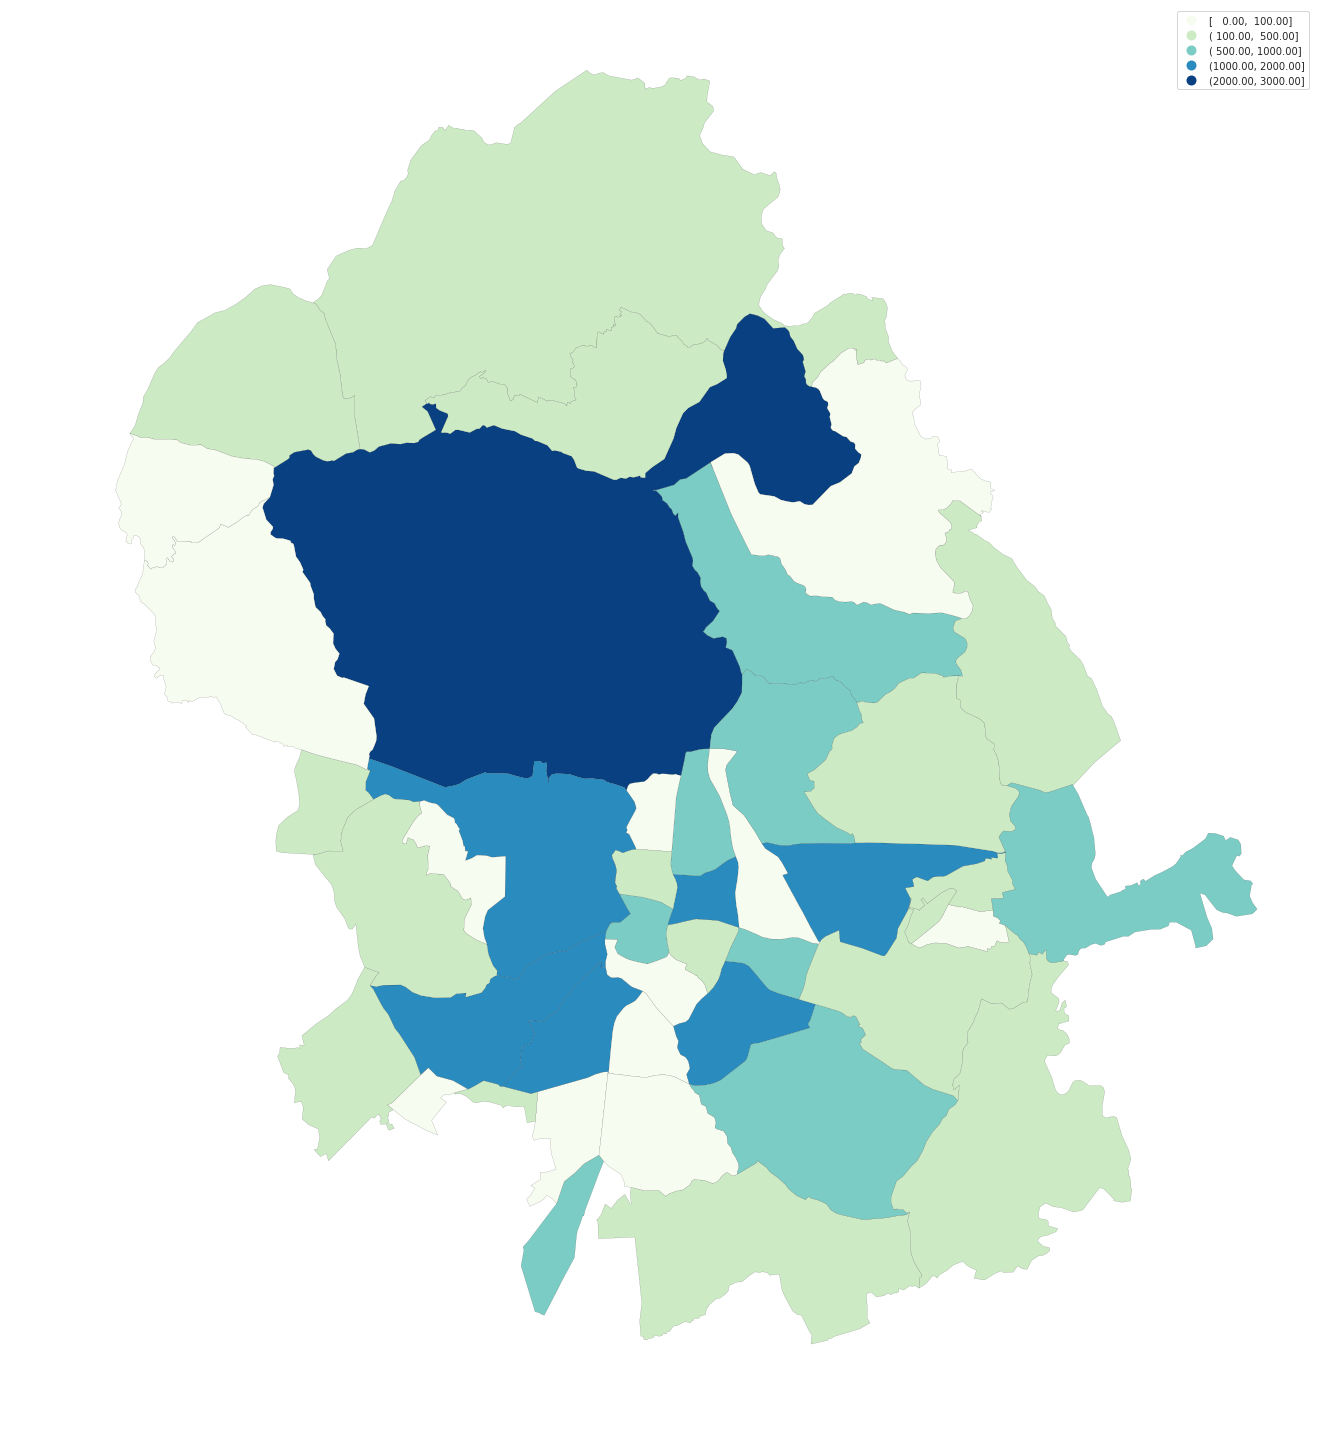

In [79]:
generate_map_plot_fn(madrid_results, 'arima-MAE', scheme='user_defined')

## Number of trips vs metrics

In [80]:
max_trips= results_gdf['total_trips'].max()+ 10000

In [81]:
min_trips= results_gdf['total_trips'].min()

In [82]:
min_error = results_gdf['gnn-MAE'].min()
max_error= results_gdf['gnn-MAE'].max() 

In [84]:
results_gdf.columns

Index(['Unnamed: 0', 'gnn-MAE', 'gnn-MSE', 'gnn-RMSE', 'naive-MAE',
       'naive-MSE', 'naive-RMSE', 'gnn-cont-MAE', 'gnn-cont-MSE',
       'gnn-cont-RMSE', 'gnn-gm-MAE', 'gnn-gm-MSE', 'gnn-gm-RMSE',
       'gnn-q-gm-MAE', 'gnn-q-gm-MSE', 'gnn-q-gm-RMSE', 'gnn-ylag-MAE',
       'gnn-ylag-MSE', 'gnn-ylag-RMSE', 'lstm-MAE', 'lstm-MSE', 'lstm-RMSE',
       'arima-MAE', 'arima-MSE', 'arima-RMSE', 'total_trips', 'geometry'],
      dtype='object')

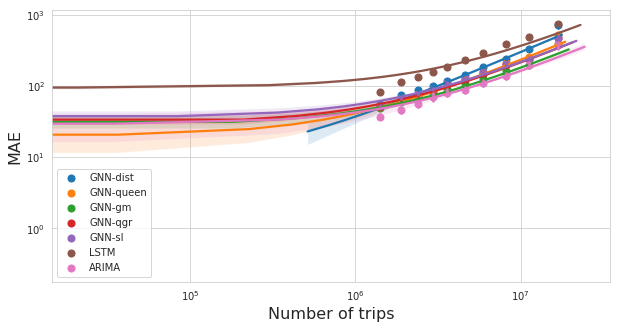

In [93]:
f, ax = plt.subplots(figsize=(10,5))
#ax.set(xlim=(min_trips, max_trips), ylim=(min_error, max_error))
ax= sns.regplot(ax=ax, x='total_trips', y='gnn-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-dist');
sns.regplot(ax=ax, x='total_trips', y='gnn-cont-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-queen');
sns.regplot(ax=ax, x='total_trips', y='gnn-gm-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-gm');
sns.regplot(ax=ax, x='total_trips', y='gnn-q-gm-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-qgr');
sns.regplot(ax=ax, x='total_trips', y='gnn-ylag-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-sl');

sns.regplot(ax=ax, x='total_trips', y='lstm-MAE', data=results_gdf, scatter=True, x_bins=10, label='LSTM');
sns.regplot(ax=ax, x='total_trips', y='arima-MAE', data=results_gdf, x_bins=10, label='ARIMA')
ax.set_ylabel('MAE')
ax.set_xlabel('Number of trips')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.set(xscale="log", yscale="log");
ax.legend(loc='lower left');
plt.savefig(os.path.join('figs','MAE_evolution.png'))

In [ ]:
print("That's all folks")